# SP500 Market Cycle Data Analysis and Transformation - v2



### Abstract and Context
* The notebook's purpose is to import data, transform, and generate the dataset (df_ml) suitable for the market (e,g., S&P 500) ML model. The purpose of the model, which drives the data requirements of this notebook, is to predict upward and downward market cycles (i.e., Bear and Bull)
* For an overview of the entire project (published in 2020) refer to the following articles
  * [Analyzing Bull and Bear Market Cycles in Python](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20200930-MarketCycle/)
  * [Market Cycle Prediction Model - Data Analysis](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20201031-MarketCycleDataAnalysis/). This is the article corresponding to the original version of this notebook.
  * [Market Cycle Prediction Model](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20201231-MarketCycleML/)
* This notebook [SP500 Market Cycle Data Analysis and Transformation - v2](https://github.com/Aljgutier/Pyquant/commit/c71b8310908c3304bea6c1280e5f711be56ce1bf) is an update of the original [SP500 Market Cycle Data Analysis and Processing](https://github.com/Aljgutier/Pyquant/blob/main/SP500_MktCycle_Data.ipynb) The following updates are made to the notebook.
  * Addition of Date Variables and Transformations. The date variables include days from the quarter start, days from quarter end, days from year start, and days to year end.
  * Addition of Interest Rate (Federal Funds Rate) and corresponding date transformations. See Section 3b "Date Variables" for details of the date transformations corresponding to federal funds rate changes. The federal funds rate variables include - interest rate change, date and days from the most recent rate change, and days from previous rate change.  
  * Generation of a recent ML dataset (May of 2022). Note that the S&P was trading near Bear territory in May of 2022. The S&P 500 market was monitored with the corresponding market cycle prediction model. 

### Contents
* Step 0. Initialize notebook     
* tep 1. Data Import    
* Step 2. Market Cycles  
* Step 3a. Join & Transform  
* Step 3b. Date Variables  
* Step 3c. Analyze and Observe  
* Step 4. Correlate & Heatmap  
* Step 5. Save the ML data frame  


# Step 0. Initialize Notebook 

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta as td
import seaborn as sns
import quandl

%run fmget
%run fmtransforms
%run fmplot
%run fmcycle

In [125]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Step 1. Data Import and/or Transform/Add


<table>
    <caption><center><strong>Table 1. Data and Sources </strong></center></caption>
    <tr>
     <td width="10%" style="text-align:left;vertical-align:center;" ><strong>Data</strong></td>
     <td width="20%" style="text-align:left;vertical-align:center;" ><strong>Source</strong></td>
     <td width="10%" style="text-align:left;vertical-align:center;" ><strong>Frequency</strong></td>
     <td width="10%" style="text-align:left;vertical-align:center;" ><strong>Start Date</strong></td>
    </tr>
     <tr>
        <td style="text-align:left;vertical-align:top;" >
          S&P 500
        </td>
        <td style="text-align:left;vertical-align:top;" >
          Yahoo Finance ^GSPC
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Daily
        </td>
       <td style="text-align:left;vertical-align:top;" >
          1927-12-30
        </td>
      </tr>
       <tr>
        <td style="text-align:left;vertical-align:top;" >
          Federal Funds Rate (Effective Rate)
        </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis, FEDFUNDSRATE
         </td>
        <td style="text-align:left;vertical-align:top;" >
          The original file was manually download. The online FRED file is updated with significant delay (~month) to the Federal Funds Rate changing. For recent Fed Funds Rate changes to be available for this notebeook, it is best to manually update the local file. 
        </td>
       <td style="text-align:left;vertical-align:top;" >
          1952-07-01
        </td>
      </tr>
      <tr>
        <td style="text-align:left;vertical-align:top;" >
          S&P P/E
        </td>
        <td style="text-align:left;vertical-align:top;" >
          Quandl
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Daily
        </td>
       <td style="text-align:left;vertical-align:top;" >
          1950-02-01
        </td>
      </tr>
     <tr>
        <td style="text-align:left;vertical-align:top;" >
          Recessions
        </td>
        <td style="text-align:left;vertical-align:top;" >
          Wikepedia (entered into a Pyquant callable function), pyquant.get_ressions()
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Recessions function updated when there is recessions (usually many years between recessions)
        </td>
       <td style="text-align:left;vertical-align:top;" >
          1950
        </td>
      </tr>
     <tr>
     <td style="text-align:left;vertical-align:top;" >
         Yield Curve 10 year (long term) fixed rate vs. 3 month (short term) rates.
      </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis, T10Y3M
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Daily
        </td>
       <td style="text-align:left;vertical-align:top;" >
          1982-1-4
        </td>
      </tr>
         <tr>
     <td style="text-align:left;vertical-align:top;" >
         Gross Domestic Product 
      </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis, GDP
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Quarterly
        </td>
        <td style="text-align:left;vertical-align:top;" >
          1947-1-1
        </td>
      </tr>
     <tr>
       <td style="text-align:left;vertical-align:top;" >
         Unemployment Rate 
        </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis, UNRATE
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Monthly
        </td>
          <td style="text-align:left;vertical-align:top;" >
          1948-1-1
        </td>
        </tr>
         <tr>
       <td style="text-align:left;vertical-align:top;" >
         Consumer Price Index 
        </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis, CPIAUCSL, 1982to1984 100% 
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Monthly
        </td>
         <td style="text-align:left;vertical-align:top;" >
          1947-1-1
        </td>
        </tr>
        <tr>
       <td style="text-align:left;vertical-align:top;" >
         Consumer Sentiment
        </td>
        <td style="text-align:left;vertical-align:top;" >
          FRED St. Louis,UMCSENT 
         </td>
        <td style="text-align:left;vertical-align:top;" >
          Monthly
        </td>
         <td style="text-align:left;vertical-align:top;" >
         1953-2-1
        </td>
      </tr>
</table>

In [300]:
# files with current set of data

%run fmget

# get recessions
recessions = get_recessions()

# Data files

sp500_file = './data/GSPC_1950-1-3_to_2020-10-5.csv'
sppe_file='./data/sppe_1950-2-1_to_2020-10-1.csv'
t10y3m_file='./data/T10Y3M_1982-1-4_to_2020-10-5.csv'
gdp_file='./data/GDP_1947-1-1_to_2020-4-1.csv'
unrate_file='./data/UNRATE_1948-1-1_to_2020-9-1.csv'
cpiaucsl_file='./data/CPIAUCSL_1947-1-1_to_2020-8-1.csv'
umcsent_file='./data/UMCSENT_1953-2-1_to_2020-8-1.csv'

sp500_file = './data/GSPC_1950-1-3_to_2020-11-4.csv'
sppe_file='./data/sppe_1950-2-1_to_2020-10-1.csv'
t10y3m_file='./data/T10Y3M_1982-1-4_to_2020-11-4.csv'
gdp_file='./data/GDP_1947-1-1_to_2020-7-1.csv'
unrate_file='./data/UNRATE_1948-1-1_to_2020-9-1.csv'
cpiaucsl_file='./data/CPIAUCSL_1947-1-1_to_2020-9-1.csv'
umcsent_file='./data/UMCSENT_1953-2-1_to_2020-9-1.csv'

# updated 5/20/2022


sp500_file =  './data/GSPC_1950-1-3_to_2022-6-8.csv'
sppe_file =  './data/sppe_1950-2-1_to_2022-6-1.csv'
t10y3m_file =  './data/T10Y3M_1982-1-4_to_2022-6-8.csv'
gdp_file =  './data/GDP_1947-1-1_to_2022-4-1.csv'
unrate_file =  './data/UNRATE_1948-1-1_to_2022-5-1.csv'
cpiaucsl_file =  './data/CPIAUCSL_1947-1-1_to_2022-4-1.csv'
umcsent_file = './data/UMCSENT_1953-2-1_to_2022-5-1.csv'
# UPDATE THIS FILE MANUALLY
#  ... check the latest fedfunds rate on FRED and update ... 5/3/2022
#  the file is usuall updated a month after a change or later so better to update manuall
#  Google what is the lates fed funds rate and the date it changed to update the file
#  keep the file current
#  THe last Fed Interest Rate Change was on 
#  first date 7/1/1954
fedfunds_file= './data/FEDFUNDS_20220503.csv'
    
df_sp500 = pd.read_csv(sp500_file,index_col=0,parse_dates=True)
df_sppe = pd.read_csv(sppe_file,index_col=0,parse_dates=True)
df_t10y3m =pd.read_csv(t10y3m_file,index_col=0,parse_dates=True)
df_gdp = pd.read_csv(gdp_file,index_col=0,header=0,parse_dates=True)
df_unrate = pd.read_csv(unrate_file,index_col=0,header=0,parse_dates=True)
df_cpiaucsl = pd.read_csv(cpiaucsl_file,index_col=0,header=0,parse_dates=True)
df_umcsent = pd.read_csv(umcsent_file,index_col=0,header=0,parse_dates=True)
df_fedfunds = pd.read_csv(fedfunds_file,index_col=0,header=0,parse_dates=True)

# update data and append, if update_data == True  
#  the data is first imported from sources as above with
update_data=False

if update_data==True:
    print('today =',dt.datetime.today())
    start=dt.datetime(2020,8,1)  # update data start
    end=dt.datetime(2022,12,31)   # update data end ... future date

    # Quandle API key
    quandle_api_key_file = "quandl_api_key_file"
    f = open(quandle_api_key_file,'r')
    quandl_api_key=f.read().strip()
    f.close

    # Fred API key
    fred_api_key_file = "fred_api_key_file"
    f = open(fred_api_key_file,'r')
    fred_api_key=f.read().strip()
    f.close

    # Yahoo Finance S&P
    df_sp500=yahoo_getappend('^GSPC',start,end,df=df_sp500,save=True,savedir='./data')
    # Quandl S&P P/E
    df_sppe=quandl_sppe_getappend(df_sppe,df_sp500,quandl_api_key, start,end,save=True, savedir='./data')
    # Fred 10 year Constant Bond minus 3 Month - the larger 3m vs 10 year means higher short term confidence
    df_t10y3m=fred_getappend('T10Y3M',start,end,df=df_t10y3m,API_KEY_FRED=fred_api_key,save=True,savedir='./data')
    # GDP ... 2 consecutive down quarters mans recision
    df_gdp=fred_getappend('GDP',start,end,df=df_gdp,API_KEY_FRED=fred_api_key,save=True,savedir='./data')
    # Un Employment rate ... tight employment before at high economy, higher unrate at recovery
    df_unrate=fred_getappend('UNRATE',start,end,df=df_unrate,API_KEY_FRED=fred_api_key,save=True,savedir='./data')
    # Consumer Price Index ... rel 1982  https://www.bls.gov/regions/mid-atlantic/data/consumerpriceindexhistorical_us_table.htm
    df_cpiaucsl=fred_getappend('CPIAUCSL',start,end,df=df_cpiaucsl,API_KEY_FRED=fred_api_key,save=True,savedir='./data')
    # U Mich. Consumer Sentiment ... https://fred.stlouisfed.org/series/UMCSENT
    df_umcsent=fred_getappend('UMCSENT',start,end,df=df_umcsent,API_KEY_FRED=fred_api_key,save=True,savedir='./data')
    print(f'df from csv, filename = {fedfunds_file}')

display(df_sp500.head(2))
display(df_t10y3m.head(2))
display(df_sppe.head(2))
display(df_gdp.head(2))
display(df_unrate.head(2))
display(df_cpiaucsl.head(2))
display(df_umcsent.head(2))
display(df_fedfunds.head(2))
    
# today = 2020-10-06 12:24:59.975927
#2020-08-01 00:00:00 2020-10-06 00:00:00
#[*********************100%***********************]  1 of 1 completed
#df to csv, filename =  ./data/GSPC_1950-1-3_to_2020-10-5.csv
#df to csv, filename =  ./data/sp500_pe_daily_1950-1-3_to_2020-10-5.csv
#df to csv, filename =  ./data/T10Y3M_1982-1-4_to_2020-10-5.csv
#df to csv, filename =  ./data/GDP_1947-1-1_to_2020-4-1.csv
#df to csv, filename =  ./data/UNRATE_1948-1-1_to_2020-9-1.csv
#df to csv, filename =  ./data/CPIAUCSL_1947-1-1_to_2020-8-1.csv
#df to csv, filename =  ./data/UMCSENT_1953-2-1_to_2020-8-1.csv



#today = 2022-05-20 09:35:26.286132
#2020-08-01 00:00:00 2022-12-31 00:00:00
#[*********************100%***********************]  1 of 1 completed
#df to csv, filename =  ./data/GSPC_1950-1-3_to_2022-5-20.csv
#df to csv, filename =  ./data/sppe_1950-2-1_to_2022-4-1.csv
#df to csv, filename =  ./data/T10Y3M_1982-1-4_to_2022-5-19.csv
#df to csv, filename =  ./data/GDP_1947-1-1_to_2022-4-1_est.csv ... add estimate for 1Q GDP
#df to csv, filename =  ./data/UNRATE_1948-1-1_to_2022-4-1.csv
# CPI  https://www.bls.gov/regions/mid-atlantic/data/consumerpriceindexhistorical_us_table.htm
#df to csv, filename =  ./data/CPIAUCSL_1947-1-1_to_2022-4-1.csv
# UMCSENT  https://fred.stlouisfed.org/series/UMCSENT
#df to csv, filename =  ./data/UMCSENT_1953-2-1_to_2022-5-1.csv  ...  manually added April 1 and May 1

,Close,High,Low,Open,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,NaN


,T10Y3M
index,
1982-01-04,2.32
1982-01-05,2.24


,PE,Close,Earnings
Date,,,
1950-02-01,7.31,17.049999,2.332421
1950-03-01,7.32,17.240000,2.355191


,GDP
index,
1947-01-01,243.164
1947-04-01,245.968


,UNRATE
index,
1948-01-01,3.4
1948-02-01,3.8


,CPIAUCSL
index,
1947-01-01,21.48
1947-02-01,21.62


,UMCSENT
index,
1953-02-01,90.7
1953-08-01,80.8


,FEDFUNDSRATE
DATE,
1954-07-01,0.80
1954-08-01,1.22


In [301]:
df_sp500.tail(2)

,Close,High,Low,Open,Volume,Adj Close
Date,,,,,,
2022-06-07,4160.680176,4164.859863,4080.189941,4096.470215,3.476470e+09,4160.680176
2022-06-08,4115.770020,4160.140137,4107.200195,4147.120117,1.888845e+09,4115.770020


# Step 2 Market Cycles

In [302]:
#Market Cycles

%run fmtransforms
%run fmplot
%run fmcycle

compute=1   # if compute is 1 then compute new market cycles, else load from saved file

f_dfmc="./data/GSPC_dfmc2020.5_1950_2020-10-5.csv"
f_dfmcs="./data/GSPC_dfmcs2020.5_1950_2020-10-5.csv"

f_dfmc="./data/GSPC_dfmc2020.5_1950_2020-11-4.csv"
f_dfmcs="./data/GSPC_dfmcs2020.5_1950_2020-11-4.csv"


f_dfmc = './data/GSPC_dfmc2020.5_1950_2022-5-19.csv'
f_dfmcs ='./data/GSPC_dfmcs2020.5_1950_2022-5-19.csv'

f_dfmc =  './data/GSPC_dfmc2020.5_1950_2022-5-20.csv'
f_dfmcs = './data/GSPC_dfmcs2020.5_1950_2022-5-20.csv'

mcycledown=20
mcycleup=20.5

#string = get_market_cycles()
print('today =',dt.datetime.today())
df_mc,df_mcsummary=fmcycles(df=df_sp500,symbol='GSPC',compute=compute, mc_filename=f_dfmc, mcs_filename=f_dfmcs,
                 mcdown_p=mcycledown,mcup_p=mcycleup,savedir="./data")

display(df_mc.tail(2))

#today = 2022-5-20
#compute ==0, read from file ...
#  save dfmc file:  ./data/GSPC_dfmc2020.5_1950_2020-10-5.csv
#  save dfmcs file: ./data/GSPC_dfmcs2020.5_1950_2020-10-5.csv
# mcdown = 20 mcup = 20.5

today = 2022-06-08 18:11:16.286448
  ... mkt: 1 Start: 1950-01-03 00:00:00 Price: 16.66 End: 1956-08-02 00:00:00 Price 49.639998999999996
  ... mkt: -1 Start: 1956-08-02 00:00:00 Price: 49.639998999999996 End: 1957-10-22 00:00:00 Price 38.98
  ... mkt: 1 Start: 1957-10-22 00:00:00 Price: 38.98 End: 1961-12-12 00:00:00 Price 72.639999
  ... mkt: -1 Start: 1961-12-12 00:00:00 Price: 72.639999 End: 1962-06-26 00:00:00 Price 52.32
  ... mkt: 1 Start: 1962-06-26 00:00:00 Price: 52.32 End: 1966-02-09 00:00:00 Price 94.059998
  ... mkt: -1 Start: 1966-02-09 00:00:00 Price: 94.059998 End: 1966-10-07 00:00:00 Price 73.199997
  ... mkt: 1 Start: 1966-10-07 00:00:00 Price: 73.199997 End: 1968-11-29 00:00:00 Price 108.370003
  ... mkt: -1 Start: 1968-11-29 00:00:00 Price: 108.370003 End: 1970-05-26 00:00:00 Price 69.290001
  ... mkt: 1 Start: 1970-05-26 00:00:00 Price: 69.290001 End: 1973-01-11 00:00:00 Price 120.239998
  ... mkt: -1 Start: 1973-01-11 00:00:00 Price: 120.239998 End: 1974-10-03 00:

,Close,High,Low,Open,Volume,Adj Close,mkt,mcupm,mcnr,mucdown,mdcup
Date,,,,,,,,,,,
2022-06-07,4160.680176,4164.859863,4080.189941,4096.470215,3.476470e+09,4160.680176,1,1,0.859605,0.13257,0
2022-06-08,4115.770020,4160.140137,4107.200195,4147.120117,1.888845e+09,4115.770020,1,1,0.839533,0.141933,0


# Step 3a Transform and Join

In [208]:
%run fmtransforms

df_ml=pd.DataFrame()

# Join PE, Earnings and Market Cycles 
# Drop Adj Close, does not make sense for S&P
# Compute Earnings percent return
df_sppe=period_percent_change(df_sppe,'Earnings',new_variable_name = 'Earnings_mom')
df_sppe=period_percent_change(df_sppe,'PE',new_variable_name = 'PE_mom')
df_ml=fmjoinff(df_mc,df_sppe[['PE','PE_mom','Earnings','Earnings_mom']],verbose=False,dropnas=True).drop(['Adj Close'],axis=1)


# Yield Curve, T10Y3M, 10 Year Treasury - 3 Month Treasury
df_ml=fmjoinff(df_ml,df_t10y3m,verbose=False,dropnas=True)


# Interest Rate
df_ml=fmjoinff(df_ml,df_fedfunds,verbose=False,dropnas=True)

# GDP
df_gdp = gdprecession(df_gdp,'GDP') # adds gdg_qoq, recession1q, recession2q
df_ml=fmjoinff(df_ml,df_gdp,verbose=False,dropnas=True)

# Unemployment
df_unrate=period_percent_change(df_unrate,'UNRATE',new_variable_name='unrate_pchange')
df_ml=fmjoinff(df_ml,df_unrate,verbose=False,dropnas=True)

# Consumer price index
df_cpi=period_percent_change(df_cpiaucsl,'CPIAUCSL',new_variable_name='cpimom')
df_ml=fmjoinff(df_ml,df_cpi[['CPIAUCSL','cpimom']],verbose=False,dropnas=True)

# Consumter Sentiment
df_umcsent=period_percent_change(df_umcsent,'UMCSENT',new_variable_name='umcsent_pchange')
df_ml=fmjoinff(df_ml,df_umcsent,verbose=False,dropnas=True)


# Simple Moving Averages
df_ml=dfsma(df_ml,'Close',windows=[20,50,200])

# Normalized mavgs
#   1-day (today / yesterday .... sma5 = 5-day smavg( today / yesterday ) .... )
df_ml=dfnma(df_ml,['Close','Volume'],windows=[1,5,10,15,20,30,50,200])

# Relative 200-day moving average
# scale of 0 to 1
df_ml=dfrma(df_ml,'Close_sma50','Close_sma200',varname='rma_sma50_sma200')
df_ml=dfrma(df_ml,'Close_sma20','Close_sma50',varname='rma_sma20_sma50')

# ADX
df_ml=dfadx(df_ml,'Close','High','Low',window=50)

# Volatility ... Log Return Std Dev, and Velocity
df_ml=dflogretstd(df_ml,'Close',windows=[25,63,126])
df_ml=dfvelocity(df_ml,'Close_lrstd25',windows=[5])
df_ml=dfvelocity(df_ml,'Close_lrstd63',windows=[5])
df_ml=dfvelocity(df_ml,'Close_lrstd126',windows=[5])


df_ml_wo_datevars = df_ml.copy()
print(df_ml_wo_datevars.columns)


display(df_ml.tail(3))

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm', 'mcnr',
       'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q',
       'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom',
       'UMCSENT', 'umcsent_pchange', 'Close_sma20', 'Close_sma50',
       'Close_sma200', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5'],
      dtype='object')


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
2022-06-01,4101.229980,4166.540039,4073.850098,4149.779785,4.145710e+09,1.0,1.0,0.833034,0.144964,0.0,20.73,-0.007184,197.840327,-0.000301,1.79,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4023.800024,4246.810215,4454.499697,-0.007483,-0.201553,0.006174,0.014410,0.004507,0.012369,0.002898,0.006571,-0.002195,0.010279,-0.002105,0.011069,-0.001812,0.009213,-0.000398,0.012637,-0.046625,-0.052512,20.196709,25.949904,21.049968,0.019559,0.016093,0.014272,-0.000176,-0.000036,2.333376e-05
2022-06-02,4176.819824,4177.509766,4074.370117,4095.409912,3.604930e+09,1.0,1.0,0.866819,0.129205,0.0,20.73,-0.007184,197.840327,-0.000301,1.75,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4025.297510,4239.485410,4452.739846,0.018431,-0.130443,0.005883,0.004991,0.006933,0.004220,0.004213,-0.006124,0.000509,0.004213,-0.000566,0.005877,-0.001544,0.006581,-0.000328,0.012517,-0.047893,-0.050522,19.792561,24.852980,21.348963,0.018510,0.016238,0.014345,-0.000362,-0.000030,1.695800e-05
2022-06-03,4108.540039,4142.669922,4098.669922,4137.569824,3.107080e+09,1.0,1.0,0.836301,0.143440,0.0,20.73,-0.007184,197.840327,-0.000301,1.75,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4024.557520,4230.145811,4450.669146,-0.016347,-0.138103,-0.002335,-0.002368,0.005284,0.019130,0.001532,-0.004303,-0.000025,-0.003368,-0.001301,0.000168,-0.002014,0.003152,-0.000403,0.010785,-0.049548,-0.048601,19.154036,24.051201,21.640031,0.018817,0.016039,0.014393,-0.000428,-0.000096,-3.646230e-07


# Step 3b Date and Temporal Variables


### Date Variables
* Modify and adapt the "Fastai" date_part 
* Key difference here wrt Fastai predictive analytics, here we are dealing with a tme-series forecast
 * rather then a plan one-hot encoding approach, we need to develop special variables
 * for example, days to quarter end
 


In [209]:

# Date Variable Functions


def _make_date(df, date_field):
    "Make sure `df[date_field]` is of the right date type."
    field_dtype = df[date_field].dtype
    if isinstance(field_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        field_dtype = np.datetime64
    if not np.issubdtype(field_dtype, np.datetime64):
        df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)

#https://github.com/fastai/fastai/blob/master/fastai/tabular/core.py#L29
def fm_add_datevars(df, field_name, prefix='dp_', drop=True, time=False):
    "Helper function that adds columns relevant to a date in the column `field_name` of `df`."
    
    df_tmp = df.copy()
    
    _make_date(df_tmp, field_name)
    field = df_tmp[field_name]

    
    # (AG) ... Add Quarter ... use this later to calculate days to and from Quarter start end
    # (AG ...  Remove Month end and Quarter End/Start ... may not be a market day ...not useful in this form 
    attr = ['Year', 'Quarter', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']
    # (AG) ... fix typo Minute not Mienute
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    # Pandas removed `dt.week` in v1.1.10
    week = field.dt.isocalendar().week.astype(field.dt.day.dtype) if hasattr(field.dt, 'isocalendar') else field.dt.week
    
    # (AG) ...this is the workhorse ... several of the original transforms are True False
    for n in attr: df_tmp[prefix + n] = getattr(field.dt, n.lower()) if n != 'Week' else week
    mask = ~field.isna()
    
    # (AG) remove elapsed ... not useful in this context
    #df[prefix + 'Elapsed'] = np.where(mask,field.values.astype(np.int64) // 10 ** 9,np.nan)
    
    if drop: df_tmp.drop(field_name, axis=1, inplace=True)
    return df_tmp

# first and last date of the quarter
def _quarter_first_last_day(row, year='Year', quarter='Quarter'):
    #q_first_date = dt.datetime(2016,1,1)
    yr, month, day  = row[year], 3 * row[quarter] - 2, 1
    row['q_first_date'] = dt.datetime(yr,month , day)
    
    month = 3 * row[quarter] + 1
    if month == 13:
        yr += 1
        month = 1
    row['q_last_date'] = dt.datetime(yr, month , day) -  timedelta(days=1)
    
    return row


def _days_tofrom_year_startend(row, year='Year', date = 'date'):
    
    row['daysfrom_y_start'] = (row[date] - dt.datetime(row[year],1,1)).days
    row['daysto_y_end'] = (dt.datetime(row[year],12,31) - row[date]).days
    
    return row



def fm_daystofrom_year_quarter(df,Year='Year', Quarter='Quarter', Month = 'Month',
                               date='date', verbose=False):
    # vars are transformed from True False variables to number of days to and from the event
    # df has date index
    
    df_tmp = df.copy()
    df_tmp.reset_index()


    print('   ... days from/to quarter start/end...')
        
    # q_first__last_day    

    df_first_last_day= df_tmp.groupby([Year, Quarter, Month])[date].last().reset_index() # date is dummy, drop it later
    df_first_last_day.drop(date,axis=1,inplace=True)
    df_first_last_day = df_first_last_day.apply(lambda row: _quarter_first_last_day(row),axis=1)
    
    if verbose == True:
        print('df_first_last_day')
        display(df_first_last_day)
    
    
    # marge back into df_tmp
    df_tmp_yearmonth=df_tmp.set_index([Year,Month])
    if verbose == True:
        print('df_tmp_yearmonth')
        display(df_tmp_yearmonth)
    
    
    df_first_last_day_yearmonth=df_first_last_day.set_index([Year,Month])
    
    if verbose == True:
        print('df_first_last_day_yearmonth')
        display(df_first_last_day_yearmonth.head())
        
    df_tmp_yearmonth.drop(Quarter, inplace=True,axis=1)
    df_tmp = df_tmp_yearmonth.join(df_first_last_day_yearmonth, how='left',lsuffix="_l", rsuffix="_r")

    if verbose == True:
        print('df_tmp joined')
        display(df_tmp.head())
    

    
    df_tmp = df_tmp.reset_index()
    # days from/to quarter start/end
    df_tmp['daysfrom_q_start']=(df_tmp[date] - df_tmp['q_first_date']).dt.days
    df_tmp['daysto_q_end']=( df_tmp['q_last_date'] - df_tmp[date]).dt.days
    
 
    
    # days from/to year start/end
    print('   ... days from/to year start/end ...')
    # year end date calculations on the entire dataframe is slow ... vectorize with pd.to_datetime ... 

    
    df_tmp['year_end_date'] = df_tmp['Year'].astype(str) + '-12-31'
    df_tmp['year_end_date']  = pd.to_datetime(df_tmp['year_end_date'])
    df_tmp['daysto_year_end'] =  (df_tmp['year_end_date'] - df_tmp['date']).dt.days
    
    df_tmp['year_start_date'] = df_tmp['Year'].astype(str) + '-1-1'
    df_tmp['year_start_date']  = pd.to_datetime(df_tmp['year_start_date'])
    df_tmp['daysfrom_year_start'] =  (df_tmp['date']-df_tmp['year_start_date']).dt.days
    
    
    if verbose == True:
        print('df_tmp w days from/to year start/end')
        display(df_tmp.head())
        
        
    
    return df_tmp

In [210]:
print(df_ml_wo_datevars.columns)
display(df_ml_wo_datevars.head())


df_ml_dvars=df_ml.copy()
df_ml_dvars=df_ml_dvars.reset_index()
df_ml_dvars.rename({'index':'date'},inplace=True, axis=1)


# basic date varibles ... Year, Quarter, Month, Day ()... 
print('Basic Date Variables')
df_ml_dvars = fm_add_datevars(df_ml_dvars, 'date', prefix='', drop=False, time=False)
display(df_ml_dvars.head())


print('days to/from year quarter end ...')
df_ml_dvars = fm_daystofrom_year_quarter(df_ml_dvars, verbose=True)
df_ml = df_ml_dvars.set_index('date')
#df_ml.drop('index',axis=1, inplace=True)
display(df_ml)



Index(['Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm', 'mcnr',
       'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q',
       'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom',
       'UMCSENT', 'umcsent_pchange', 'Close_sma20', 'Close_sma50',
       'Close_sma200', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5'],
      dtype='object')


,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN


Basic Date Variables


,date,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Year,Quarter,Month,Week,Day,Dayofweek,Dayofyear
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,1,1,1,3,1,3
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1950,1,1,1,4,2,4
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1950,1,1,1,5,3,5
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1950,1,1,1,6,4,6
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,1950,1,1,2,9,0,9


days to/from year quarter end ...
   ... days from/to quarter start/end...
df_first_last_day


,Year,Quarter,Month,q_first_date,q_last_date
0,1950,1,1,1950-01-01,1950-03-31
1,1950,1,2,1950-01-01,1950-03-31
2,1950,1,3,1950-01-01,1950-03-31
3,1950,2,4,1950-04-01,1950-06-30
4,1950,2,5,1950-04-01,1950-06-30
...,...,...,...,...,...
865,2022,1,2,2022-01-01,2022-03-31
866,2022,1,3,2022-01-01,2022-03-31
867,2022,2,4,2022-04-01,2022-06-30
868,2022,2,5,2022-04-01,2022-06-30


df_tmp_yearmonth


date        Close         High          Low         Open  \
Year Month                                                                  
1950 1     1950-01-03    16.660000    16.660000    16.660000    16.660000   
     1     1950-01-04    16.850000    16.850000    16.850000    16.850000   
     1     1950-01-05    16.930000    16.930000    16.930000    16.930000   
     1     1950-01-06    16.980000    16.980000    16.980000    16.980000   
     1     1950-01-09    17.080000    17.080000    17.080000    17.080000   
...               ...          ...          ...          ...          ...   
2022 5     2022-05-30  4158.240234  4158.490234  4077.429932  4077.429932   
     5     2022-05-31  4132.149902  4168.339844  4104.879883  4151.089844   
     6     2022-06-01  4101.229980  4166.540039  4073.850098  4149.779785   
     6     2022-06-02  4176.819824  4177.509766  4074.370117  4095.409912   
     6     2022-06-03  4108.540039  4142.669922  4098.669922  4137.569824   

                  Volume  mkt  mcupm      mcnr   mucdown  mdcup     PE  \
Year Month                                                               
1950 1      1.260000e+06  1.0    1.0  0.000000  0.000000    0.0    NaN   
     1      1.890000e+06  1.0    1.0  0.011405  0.000000    0.0    NaN   
     1      2.550000e+06  1.0    1.0  0.016206  0.000000    0.0    NaN   
     1      2.010000e+06  1.0    1.0  0.019208  0.000000    0.0    NaN   
     1      2.520000e+06  1.0    1.0  0.025210  0.000000    0.0    NaN   
...                  ...  ...    ...       ...       ...    ...    ...   
2022 5      3.560560e+09  1.0    1.0  0.858515  0.133079    0.0  22.19   
     5      5.192220e+09  1.0    1.0  0.846854  0.138518    0.0  20.88   
     6      4.145710e+09  1.0    1.0  0.833034  0.144964    0.0  20.73   
     6      3.604930e+09  1.0    1.0  0.866819  0.129205    0.0  20.73   
     6      3.107080e+09  1.0    1.0  0.836301  0.143440    0.0  20.73   

              PE_mom    Earnings  Earnings_mom  T10Y3M  FEDFUNDSRATE  \
Year Month                                                             
1950 1           NaN         NaN           NaN     NaN           NaN   
     1           NaN         NaN           NaN     NaN           NaN   
     1           NaN         NaN           NaN     NaN           NaN   
     1           NaN         NaN           NaN     NaN           NaN   
     1           NaN         NaN           NaN     NaN           NaN   
...              ...         ...           ...     ...           ...   
2022 5     -0.140921  204.860742      0.168007    1.66          0.83   
     5     -0.059036  197.899900     -0.033978    1.69          0.83   
     6     -0.007184  197.840327     -0.000301    1.79          0.83   
     6     -0.007184  197.840327     -0.000301    1.75          0.83   
     6     -0.007184  197.840327     -0.000301    1.75          0.83   

                  GDP   gdp_qoq  recession1q  recession2q  UNRATE  \
Year Month                                                          
1950 1        280.828  0.037694          0.0          0.0     6.5   
     1        280.828  0.037694          0.0          0.0     6.5   
     1        280.828  0.037694          0.0          0.0     6.5   
     1        280.828  0.037694          0.0          0.0     6.5   
     1        280.828  0.037694          0.0          0.0     6.5   
...               ...       ...          ...          ...     ...   
2022 5      24041.325 -0.014000          1.0          0.0     3.6   
     5      24041.325 -0.014000          1.0          0.0     3.6   
     6      24041.325 -0.014000          1.0          0.0     3.6   
     6      24041.325 -0.014000          1.0          0.0     3.6   
     6      24041.325 -0.014000          1.0          0.0     3.6   

            unrate_pchange  CPIAUCSL    cpimom  UMCSENT  umcsent_pchange  \
Year Month                                                                 
1950 1           -0.015152    23.510 -0.004235      NaN          

df_first_last_day_yearmonth


Quarter q_first_date q_last_date
Year Month                                  
1950 1            1   1950-01-01  1950-03-31
     2            1   1950-01-01  1950-03-31
     3            1   1950-01-01  1950-03-31
     4            2   1950-04-01  1950-06-30
     5            2   1950-04-01  1950-06-30

df_tmp joined


date  Close   High    Low   Open     Volume  mkt  mcupm  \
Year Month                                                                 
1950 1     1950-01-03  16.66  16.66  16.66  16.66  1260000.0  1.0    1.0   
     1     1950-01-04  16.85  16.85  16.85  16.85  1890000.0  1.0    1.0   
     1     1950-01-05  16.93  16.93  16.93  16.93  2550000.0  1.0    1.0   
     1     1950-01-06  16.98  16.98  16.98  16.98  2010000.0  1.0    1.0   
     1     1950-01-09  17.08  17.08  17.08  17.08  2520000.0  1.0    1.0   

                mcnr  mucdown  mdcup  PE  PE_mom  Earnings  Earnings_mom  \
Year Month                                                                 
1950 1      0.000000      0.0    0.0 NaN     NaN       NaN           NaN   
     1      0.011405      0.0    0.0 NaN     NaN       NaN           NaN   
     1      0.016206      0.0    0.0 NaN     NaN       NaN           NaN   
     1      0.019208      0.0    0.0 NaN     NaN       NaN           NaN   
     1      0.025210      0.0    0.0 NaN     NaN       NaN           NaN   

            T10Y3M  FEDFUNDSRATE      GDP   gdp_qoq  recession1q  recession2q  \
Year Month                                                                      
1950 1         NaN           NaN  280.828  0.037694          0.0          0.0   
     1         NaN           NaN  280.828  0.037694          0.0          0.0   
     1         NaN           NaN  280.828  0.037694          0.0          0.0   
     1         NaN           NaN  280.828  0.037694          0.0          0.0   
     1         NaN           NaN  280.828  0.037694          0.0          0.0   

            UNRATE  unrate_pchange  CPIAUCSL    cpimom  UMCSENT  \
Year Month                                                        
1950 1         6.5       -0.015152     23.51 -0.004235      NaN   
     1         6.5       -0.015152     23.51 -0.004235      NaN   
     1         6.5       -0.015152     23.51 -0.004235      NaN   
     1         6.5       -0.015152     23.51 -0.004235      NaN   
     1         6.5       -0.015152     23.51 -0.004235      NaN   

            umcsent_pchange  Close_sma20  Close_sma50  Close_sma200  \
Year Month                                                            
1950 1                  NaN          NaN          NaN           NaN   
     1                  NaN          NaN          NaN           NaN   
     1                  NaN          NaN          NaN           NaN   
     1                  NaN          NaN          NaN           NaN   
     1                  NaN          NaN          NaN           NaN   

            Close_nma1  Volume_nma1  Close_nma5  Volume_nma5  Close_nma10  \
Year Month                                                                  
1950 1             NaN          NaN         NaN          NaN          NaN   
     1        0.011405     0.500000         NaN          NaN          NaN   
     1        0.004748     0.349206         NaN          NaN          NaN   
     1        0.002953    -0.211765         NaN          NaN          NaN   
     1        0.005889     0.253731         NaN          NaN          NaN   

            Volume_nma10  Close_nma15  Volume_nma15  Close_nma20  \
Year Month                                                         
1950 1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   

            Volume_nma20  Close_nma30  Volume_nma30  Close_nma50  \
Year Month                                                         
1950 1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN          NaN   
     1               NaN          NaN           NaN       

   ... days from/to year start/end ...
df_tmp w days from/to year start/end


,Year,Month,date,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
0,1950,1,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2
1,1950,1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3
2,1950,1,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4
3,1950,1,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5
4,1950,1,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8


,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.660000,16.660000,16.660000,16.660000,1.260000e+06,1.0,1.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2
1950-01-04,1950,1,16.850000,16.850000,16.850000,16.850000,1.890000e+06,1.0,1.0,0.011405,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3
1950-01-05,1950,1,16.930000,16.930000,16.930000,16.930000,2.550000e+06,1.0,1.0,0.016206,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.000000,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4
1950-01-06,1950,1,16.980000,16.980000,16.980000,16.980000,2.010000e+06,1.0,1.0,0.019208,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.000000,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5
1950-01-09,1950,1,17.080000,17.080000,17.080000,17.080000,2.520000e+06,1.0,1.0,0.025210,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.000000,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,2022,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,22.19,-0.140921,204.860742,0.168007,1.66,0.83,24041.325,-0.014000,1.0,0.0,3.6,0.000000,288.663,0.003319,59.1,-0.093558,4035.913525,4261.670625,4458.229648,0.000000,0.000000,0.009191,0.014623,0.003860,0.002420,0.002881,-0.011408,0.000228,-0.004597,-0.002159,0.008926,-0.001495,0.002142,-0.000314,0.011938,-0.044089,-0.052974,21.143415,26.338097,21.247421,0.020172,0.016507,0.014267,-0.000038,0.000009,1.191279e-05,22,30,0,150,2,2022-04-01,2022-06-30,59,31,2022-12-31,215,2022-01-01,149
2022-05-31,2022,5,4132.149902,4168.339844,4104.879883,4151.089844,5.192220e+09,1.0,1.0,0.846854,0.138518,0.0,20.88,-0.059036,197.899900,-0.033978,1.69,0.83,24041.325,-0.014000,1.0,0.0,3.6,0.000000,288.663,0.003319,59.1,-0.093558,4033.747021,4255.188818,4456.540398,-0.006274,0.458259,0.009560,0.0

### Interest Rate Temporal Variables

In [211]:
print(df_ml.columns)
df_ml.head(5)

Index(['Year', 'Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt',
       'mcupm', 'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings',
       'Earnings_mom', 'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq',
       'recession1q', 'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL',
       'cpimom', 'UMCSENT', 'umcsent_pchange', 'Close_sma20', 'Close_sma50',
       'Close_sma200', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto

,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2
1950-01-04,1950,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3
1950-01-05,1950,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4
1950-01-06,1950,1,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5
1950-01-09,1950,1,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8


In [216]:
# Federal Funds Interest Rate Change Date Variables

def fedfunds_datevars(df, fedfundsrate = 'FEDFUNDSRATE', date='date', verbose=False):
    
    
    df_tmp = df_ml.copy()
    
    display(df_tmp.head())
    
    df_fedfunds_deltas = df_tmp[fedfundsrate].reset_index()
    df_fedfunds_deltas = df_fedfunds_deltas.dropna(axis=0)
    
    print('df_fedfunds_deltas["FEDFUNDSRATE"] ... no transformations yet')
    display(df_fedfunds_deltas)
    
    
    ## Fed Funds Rate Variables ... 
    #   deltas and date when rate changed, 
    #   days from prev setting ... prev1 and prev2
    df_fedfunds_deltas['FFR_prev1'] =  df_fedfunds_deltas['FEDFUNDSRATE'].shift(1)
    df_fedfunds_deltas['FFR_prev1_delta'] =  df_fedfunds_deltas['FEDFUNDSRATE'] - df_fedfunds_deltas['FFR_prev1']
    df_fedfunds_deltas = df_fedfunds_deltas[df_fedfunds_deltas['FFR_prev1_delta'] != 0 ]
    df_fedfunds_deltas['FFR_prev1_date'] =  df_fedfunds_deltas['date'].shift(1)
    df_fedfunds_deltas['FFR_prev2'] = df_fedfunds_deltas['FFR_prev1'].shift(1)
    df_fedfunds_deltas['FFR_prev2_delta'] = df_fedfunds_deltas['FFR_prev1_delta'].shift(1)
    df_fedfunds_deltas['FFR_prev2_date'] = df_fedfunds_deltas['FFR_prev1_date'].shift(1)
    df_fedfunds_deltas['FFR_days_from_prev1'] = (df_fedfunds_deltas[date] - df_fedfunds_deltas['FFR_prev1_date']).dt.days
    df_fedfunds_deltas['FFR_days_from_prev2'] = (df_fedfunds_deltas[date] - df_fedfunds_deltas['FFR_prev2_date']).dt.days

    ### FFR_id
    df_fedfunds_deltas.reset_index(inplace=True) # index becomes a column, an ID of each delta. Use for groupby later
    df_fedfunds_deltas.rename({'index':'FFR_id'},axis=1, inplace=True)
    df_fedfunds_deltas = df_fedfunds_deltas.set_index('date')
    print('df_fedfunds_deltas w FFR_id')
    
    display(df_fedfunds_deltas.tail(10)) # note index will not be contiguous because of delta above

    ### join back to df_ml
    join_cols=['FFR_id', 'FFR_prev1', 'FFR_prev1_date', 'FFR_prev2_date',
           'FFR_prev2', 'FFR_prev1_delta',  'FFR_prev2_delta', 'FFR_days_from_prev1',
           'FFR_days_from_prev2']


    df_tmp = df_tmp.join(df_fedfunds_deltas[join_cols], how='left') 

    print('df_tmo with FFR deltas, with empty days to previous change')
    display(df_tmp)
    
    
    ### days from FFR_prev1,2
    print('fill NAs')
    df_tmp['FFR_id']=df_tmp['FFR_id'].ffill()
    df_tmp[['FFR_days_from_prev1','FFR_days_from_prev2']]=df_tmp[['FFR_days_from_prev1','FFR_days_from_prev2']].fillna(1)

    fill_cols = ['FFR_prev1_date','FFR_prev2_date','FFR_prev1_delta','FFR_prev2_delta','FFR_prev1','FFR_prev2']

    print(df_tmp.columns)
    display(df_tmp)
    df_tmp[fill_cols]=df_tmp[fill_cols].ffill()
    display(df_tmp.head(5))
    display(df_tmp.tail(10))


    print('FFR days from prev cumsum')
    df_tmp['FFR_days_from_prev1'] = df_tmp.groupby('FFR_id')['FFR_days_from_prev1'].cumsum()
    df_tmp['FFR_days_from_prev2'] = df_tmp.groupby('FFR_id')['FFR_days_from_prev2'].cumsum()
    display(df_tmp.head(10))
    display(df_tmp.tail(10))
    
    
    return df_tmp

In [217]:

print('fed funds rate date variables')
df_ml = fedfunds_datevars(df_ml, verbose=True)

fed funds rate date variables


,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2
1950-01-04,1950,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3
1950-01-05,1950,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4
1950-01-06,1950,1,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5
1950-01-09,1950,1,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8


df_fedfunds_deltas["FEDFUNDSRATE"] ... no transformations yet


,date,FEDFUNDSRATE
1144,1954-07-01,0.80
1145,1954-07-02,0.80
1146,1954-07-06,0.80
1147,1954-07-07,0.80
1148,1954-07-08,0.80
...,...,...
18556,2022-05-30,0.83
18557,2022-05-31,0.83
18558,2022-06-01,0.83
18559,2022-06-02,0.83


df_fedfunds_deltas w FFR_id


,FFR_id,FEDFUNDSRATE,FFR_prev1,FFR_prev1_delta,FFR_prev1_date,FFR_prev2,FFR_prev2_delta,FFR_prev2_date,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,
2021-02-01,18207,0.08,0.09,-0.01,2020-09-01,0.10,-0.01,2020-08-01,153.0,184.0
2021-03-01,18227,0.07,0.08,-0.01,2021-02-01,0.09,-0.01,2020-09-01,28.0,181.0
2021-05-01,18272,0.06,0.07,-0.01,2021-03-01,0.08,-0.01,2021-02-01,61.0,89.0
2021-06-01,18294,0.08,0.06,0.02,2021-05-01,0.07,-0.01,2021-03-01,31.0,92.0
2021-07-01,18316,0.10,0.08,0.02,2021-06-01,0.06,0.02,2021-05-01,30.0,61.0
2021-08-01,18338,0.09,0.10,-0.01,2021-07-01,0.08,0.02,2021-06-01,31.0,61.0
2021-09-01,18361,0.08,0.09,-0.01,2021-08-01,0.10,-0.01,2021-07-01,31.0,62.0
2022-03-01,18491,0.20,0.08,0.12,2021-09-01,0.09,-0.01,2021-08-01,181.0,212.0
2022-04-01,18514,0.33,0.20,0.13,2022-03-01,0.08,0.12,2021-09-01,31.0,212.0


df_tmo with FFR deltas, with empty days to previous change


,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.660000,16.660000,16.660000,16.660000,1.260000e+06,1.0,1.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-04,1950,1,16.850000,16.850000,16.850000,16.850000,1.890000e+06,1.0,1.0,0.011405,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-05,1950,1,16.930000,16.930000,16.930000,16.930000,2.550000e+06,1.0,1.0,0.016206,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.000000,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-06,1950,1,16.980000,16.980000,16.980000,16.980000,2.010000e+06,1.0,1.0,0.019208,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.000000,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-09,1950,1,17.080000,17.080000,17.080000,17.080000,2.520000e+06,1.0,1.0,0.025210,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.000000,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,2022,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,22.19,-0.140921,204.860742,0.168007,1.66,0.83,24041.325,-0.014000,1.0,0.0,3.6,0.000000,288.663,0.003319,59.1,-0.093558,4035.913525,4261.670625,4458.229648,0.000000,0.000000,0.009191,0.014623,0.003860,0.002420,0.002881,-0.011408,0.000228,-0.004597,-0.002159,0.008926,-0.001495,0.002142,-0.000314,0.011938,-0.044089,-0.052974,21.143415,26.338097,21.247421,0.020172,0.016507,0.014267,-0.000038,0.000009,1.191279e-05,22,30,0,150,2,

fill NAs
Index(['Year', 'Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt',
       'mcupm', 'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings',
       'Earnings_mom', 'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq',
       'recession1q', 'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL',
       'cpimom', 'UMCSENT', 'umcsent_pchange', 'Close_sma20', 'Close_sma50',
       'Close_sma200', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
     

,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.660000,16.660000,16.660000,16.660000,1.260000e+06,1.0,1.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-04,1950,1,16.850000,16.850000,16.850000,16.850000,1.890000e+06,1.0,1.0,0.011405,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-05,1950,1,16.930000,16.930000,16.930000,16.930000,2.550000e+06,1.0,1.0,0.016206,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.000000,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-06,1950,1,16.980000,16.980000,16.980000,16.980000,2.010000e+06,1.0,1.0,0.019208,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.000000,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-09,1950,1,17.080000,17.080000,17.080000,17.080000,2.520000e+06,1.0,1.0,0.025210,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.510,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.000000,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,2022,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,22.19,-0.140921,204.860742,0.168007,1.66,0.83,24041.325,-0.014000,1.0,0.0,3.6,0.000000,288.663,0.003319,59.1,-0.093558,4035.913525,4261.670625,4458.229648,0.000000,0.000000,0.009191,0.014623,0.003860,0.002420,0.002881,-0.011408,0.000228,-0.004597,-0.002159,0.008926,-0.001495,0.002142,-0.000314,0.011938,-0.044089,-0.052974,21.143415,26.338097,21.247421,0.020172,0.016507,0.014267,-0.000038,0.000009,1.191279e-05,22,30,0,150,2,

,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-04,1950,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-05,1950,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-06,1950,1,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0
1950-01-09,1950,1,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,1.0,1.0


,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-23,2022,5,3973.750000,3981.879883,3909.040039,3919.419922,3.392770e+09,1.0,1.0,0.776057,0.171542,0.0,22.19,-0.140921,204.860742,0.168007,1.79,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4065.722009,4299.888813,4468.304093,0.018555,0.130025,-0.001472,-0.009783,-0.000274,-0.024424,-0.002760,-0.011004,-0.002258,0.000889,-0.003195,0.004337,-0.001269,0.004347,-0.000436,0.010927,-0.037691,-0.054459,16.236528,30.278986,22.103695,0.020360,0.016465,0.014208,0.000376,0.000180,8.237933e-05,21,23,0,143,2,2022-04-01,2022-06-30,52,38,2022-12-31,222,2022-01-01,142,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,1.0,1.0
2022-05-24,2022,5,3941.479980,3955.679932,3875.129883,3942.939941,3.901640e+09,1.0,1.0,0.761634,0.178269,0.0,22.19,-0.140921,204.860742,0.168007,1.70,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4053.598010,4291.561216,4465.982494,-0.008121,0.149987,-0.007130,0.019050,-0.001331,-0.006982,-0.003624,0.007883,-0.002769,0.006847,-0.003838,0.011063,-0.001879,0.004248,-0.000483,0.011414,-0.039056,-0.055449,15.597642,30.440538,22.721402,0.020354,0.016212,0.014189,0.000299,0.000087,5.350420e-05,21,24,1,144,2,2022-04-01,2022-06-30,53,37,2022-12-31,221,2022-01-01,143,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,1.0,1.0
2022-05-25,2022,5,3978.729980,3999.330078,3925.030029,3929.590088,4.322190e+09,1.0,1.0,0.778283,0.170503,0.0,22.19,-0.140921,204.860742,0.168007,1.69,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4038.159509,4282.902417,4463.667794,0.009451,0.107788,0.002839,0.010328,0.001260,0.002651,-0.004984,0.008902,-0.003534,0.011036,-0.003118,0.010974,-0.001937,0.009715,-0.000476,0.012359,-0.040497,-0.057144,16.889216,29.529403,22.719325,0.020439,0.016272,0.014155,0.000034,-0.000060,-4.350962e-05,21,25,2,145,2,2022-04-01,2022-06-30,54,36,2022-12-31,220,2022-01-01,144,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,1.0,1.0
2022-05-26,2022,5,4057.840088,4075.139893,3984.600098,3984.600098,3.961940e+09,1.0,1.0,0.813641,0.154010,0.0,22.19,-0.140921,204.860742,0.168007,1.68,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4034.455005,4274.796816,4461.559346,0.019883,-0.083349,0.007983,0.003449,0.003378,-0.011682,-0.001282,0.003953,-0.000725,0.007195,-0.002455,0.008195,-0.001772,-0.003966,-0.000420,0.011772,-0.041860,-0.056223,19.288151,28.382092,22.003357,0.020321,0.016386,0.014260,0.000015,-0.000032,2.443388e-06,21,26,3,146,2,2022-04-01,2022-06-30,55,35,2022-12-31,219,2022-01-01,145,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,1.0,1.0
2022-05-27,2022,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,22.19,-0.140921,204.860742,0.168007,1.66,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4035.770508,4268.738018,4459.919397,0.024742,-0.101309,0.012902,0.040628,0.003465,-0.005271,0.000745,-0.003701,0.000512,0.002130,-0.001624,0.005968,-0.001269,0.002151,-0.000303,0.011143,-0.042867,-0.054575,21.861338,2

FFR days from prev cumsum


,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.660000,16.660000,16.660000,16.660000,1260000.0,1.0,1.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-04,1950,1,16.850000,16.850000,16.850000,16.850000,1890000.0,1.0,1.0,0.011405,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-05,1950,1,16.930000,16.930000,16.930000,16.930000,2550000.0,1.0,1.0,0.016206,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.000000,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-06,1950,1,16.980000,16.980000,16.980000,16.980000,2010000.0,1.0,1.0,0.019208,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.000000,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-09,1950,1,17.080000,17.080000,17.080000,17.080000,2520000.0,1.0,1.0,0.025210,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.000000,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-10,1950,1,17.030001,17.030001,17.030001,17.030001,2160000.0,1.0,1.0,0.022209,0.002927,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,-0.002927,-0.142857,0.004414,0.149663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.540821,1.138480,45.336055,NaN,NaN,NaN,NaN,NaN,NaN,2,10,1,10,1,1950-01-01,1950-03-31,9,80,1950-12-31,355,1950-01-01,9,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-11,1950,1,17.090000,17.090000,17.090000,17.090000,2630000.0,1.0,1.0,0.025810,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.003523,0.217593,0.002837,0.093182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.823085,1.122518,41.636124,NaN,NaN,NaN,NaN,NaN,NaN,2,11,2,11,1,1950-01-01,1950-03-31,10,79,1950-12-31,354,1950-01-01,10,NaN,NaN,NaT,NaT,NaN,NaN,

,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-23,2022,5,3973.750000,3981.879883,3909.040039,3919.419922,3.392770e+09,1.0,1.0,0.776057,0.171542,0.0,22.19,-0.140921,204.860742,0.168007,1.79,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4065.722009,4299.888813,4468.304093,0.018555,0.130025,-0.001472,-0.009783,-0.000274,-0.024424,-0.002760,-0.011004,-0.002258,0.000889,-0.003195,0.004337,-0.001269,0.004347,-0.000436,0.010927,-0.037691,-0.054459,16.236528,30.278986,22.103695,0.020360,0.016465,0.014208,0.000376,0.000180,8.237933e-05,21,23,0,143,2,2022-04-01,2022-06-30,52,38,2022-12-31,222,2022-01-01,142,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,46.0,77.0
2022-05-24,2022,5,3941.479980,3955.679932,3875.129883,3942.939941,3.901640e+09,1.0,1.0,0.761634,0.178269,0.0,22.19,-0.140921,204.860742,0.168007,1.70,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4053.598010,4291.561216,4465.982494,-0.008121,0.149987,-0.007130,0.019050,-0.001331,-0.006982,-0.003624,0.007883,-0.002769,0.006847,-0.003838,0.011063,-0.001879,0.004248,-0.000483,0.011414,-0.039056,-0.055449,15.597642,30.440538,22.721402,0.020354,0.016212,0.014189,0.000299,0.000087,5.350420e-05,21,24,1,144,2,2022-04-01,2022-06-30,53,37,2022-12-31,221,2022-01-01,143,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,47.0,78.0
2022-05-25,2022,5,3978.729980,3999.330078,3925.030029,3929.590088,4.322190e+09,1.0,1.0,0.778283,0.170503,0.0,22.19,-0.140921,204.860742,0.168007,1.69,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4038.159509,4282.902417,4463.667794,0.009451,0.107788,0.002839,0.010328,0.001260,0.002651,-0.004984,0.008902,-0.003534,0.011036,-0.003118,0.010974,-0.001937,0.009715,-0.000476,0.012359,-0.040497,-0.057144,16.889216,29.529403,22.719325,0.020439,0.016272,0.014155,0.000034,-0.000060,-4.350962e-05,21,25,2,145,2,2022-04-01,2022-06-30,54,36,2022-12-31,220,2022-01-01,144,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,48.0,79.0
2022-05-26,2022,5,4057.840088,4075.139893,3984.600098,3984.600098,3.961940e+09,1.0,1.0,0.813641,0.154010,0.0,22.19,-0.140921,204.860742,0.168007,1.68,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4034.455005,4274.796816,4461.559346,0.019883,-0.083349,0.007983,0.003449,0.003378,-0.011682,-0.001282,0.003953,-0.000725,0.007195,-0.002455,0.008195,-0.001772,-0.003966,-0.000420,0.011772,-0.041860,-0.056223,19.288151,28.382092,22.003357,0.020321,0.016386,0.014260,0.000015,-0.000032,2.443388e-06,21,26,3,146,2,2022-04-01,2022-06-30,55,35,2022-12-31,219,2022-01-01,145,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,49.0,80.0
2022-05-27,2022,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,22.19,-0.140921,204.860742,0.168007,1.66,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,4035.770508,4268.738018,4459.919397,0.024742,-0.101309,0.012902,0.040628,0.003465,-0.005271,0.000745,-0.003701,0.000512,0.002130,-0.001624,0.005968,-0.001269,0.002151,-0.000303,0.011143,-0.042867,-0.054575,21.

In [218]:
df_ml[['Year','Month','Close','FEDFUNDSRATE','FFR_id']]

,Year,Month,Close,FEDFUNDSRATE,FFR_id
date,,,,,
1950-01-03,1950,1,16.660000,NaN,NaN
1950-01-04,1950,1,16.850000,NaN,NaN
1950-01-05,1950,1,16.930000,NaN,NaN
1950-01-06,1950,1,16.980000,NaN,NaN
1950-01-09,1950,1,17.080000,NaN,NaN
...,...,...,...,...,...
2022-05-30,2022,5,4158.240234,0.83,18537.0
2022-05-31,2022,5,4132.149902,0.83,18537.0
2022-06-01,2022,6,4101.229980,0.83,18537.0


# Step 3c Analyze and Observe

In [265]:
df_mcsummary

,mkt,startDate,endDate,mcnr,startPrice,endPrice
1950-01-03,1.0,1950-01-03,1956-08-02,1.979592,16.660000,49.639999
1956-08-02,-1.0,1956-08-02,1957-10-22,-0.214746,49.639999,38.980000
1957-10-22,1.0,1957-10-22,1961-12-12,0.863520,38.980000,72.639999
1961-12-12,-1.0,1961-12-12,1962-06-26,-0.279736,72.639999,52.320000
1962-06-26,1.0,1962-06-26,1966-02-09,0.797783,52.320000,94.059998
1966-02-09,-1.0,1966-02-09,1966-10-07,-0.221773,94.059998,73.199997
1966-10-07,1.0,1966-10-07,1968-11-29,0.480465,73.199997,108.370003
1968-11-29,-1.0,1968-11-29,1970-05-26,-0.360616,108.370003,69.290001
1970-05-26,1.0,1970-05-26,1973-01-11,0.735315,69.290001,120.239998
1973-01-11,-1.0,1973-01-11,1974-10-03,-0.482036,120.239998,62.279999


### COVID BEAR

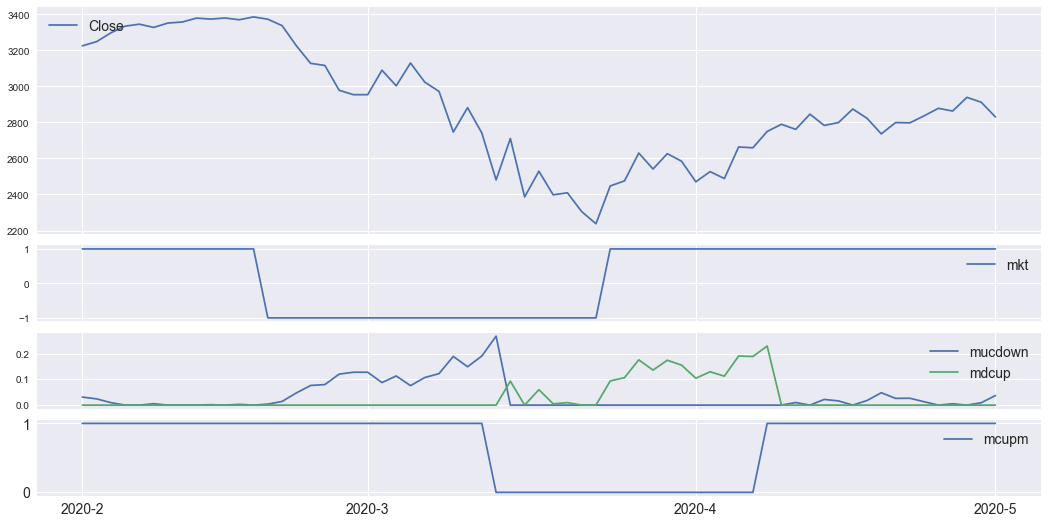

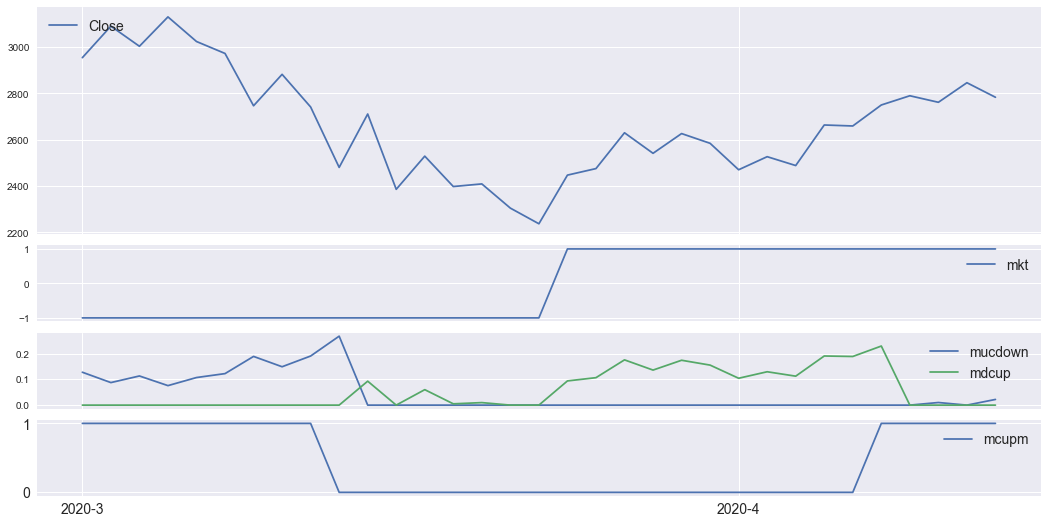

market high


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2020-02-19,3386.149902,1.0,0.0,0.0,1.0


mcupm 1 to 0 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2020-03-11,2741.379883,-1.0,0.190414,0.0,1.0
2020-03-12,2480.639893,-1.0,0.267416,0.0,0.0


mcupm 0 to 1 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2020-04-07,2659.409912,1.0,0.0,0.188616,0.0
2020-04-08,2749.979980,1.0,0.0,0.229096,1.0


In [257]:
# COVID
%run fmplot


s=dt.datetime(2020,2,1)
e=dt.datetime(2020,5,1)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))



s=dt.datetime(2020,3,1)
e=dt.datetime(2020,4,15)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))

print('market high')
s=dt.datetime(2020,2,19)
e=dt.datetime(2020,2,19)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 1 to 0 market change detected')
s=dt.datetime(2020,3,11)
e=dt.datetime(2020,3,12)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 0 to 1 market change detected')
s=dt.datetime(2020,4,7)
e=dt.datetime(2020,4,8)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

### 2007 - 2008 Financial Crisis

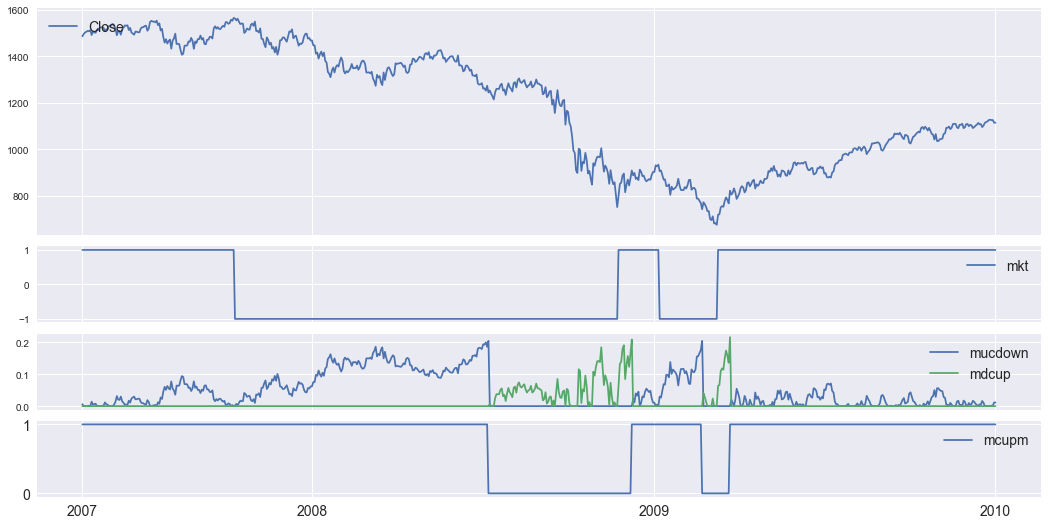

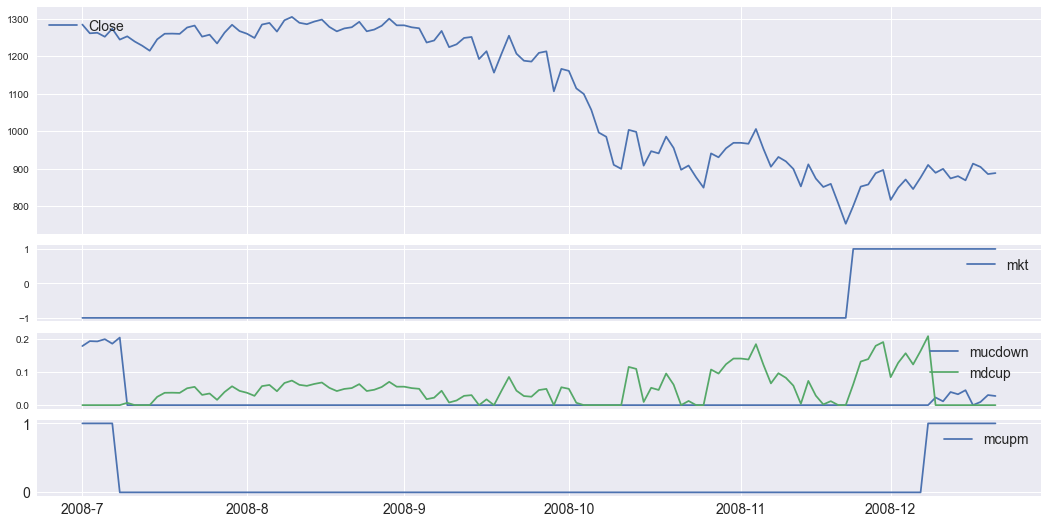

market high


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2007-10-09,1565.150024,1.0,0.0,0.0,1.0


mcupm 1 to 0 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2008-07-07,1252.310059,-1.0,0.199879,0.00000,1.0
2008-07-08,1273.699951,-1.0,0.186212,0.00000,1.0
2008-07-09,1244.689941,-1.0,0.204747,0.00000,0.0
2008-07-10,1253.390015,-1.0,0.000000,0.00699,0.0


mcupm 0 to 1 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2008-12-04,845.219971,1.0,0.000000,0.123305,0.0
2008-12-05,876.070007,1.0,0.000000,0.164305,0.0
2008-12-08,909.700012,1.0,0.000000,0.209000,1.0
2008-12-09,888.669983,1.0,0.023118,0.000000,1.0


In [275]:
# 2007 - 2008 Financial Crisis
%run fmplot

s=dt.datetime(2007,5,1)
e=dt.datetime(2010,1,1)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))


s=dt.datetime(2008,7,1)
e=dt.datetime(2008,12,20)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))

print('market high')
s=dt.datetime(2007,10,9)
e=dt.datetime(2007,10,9)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 1 to 0 market change detected')
s=dt.datetime(2008,7,7)
e=dt.datetime(2008,7,10)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 0 to 1 market change detected')
s=dt.datetime(2008,12,4)
e=dt.datetime(2008,12,9)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])


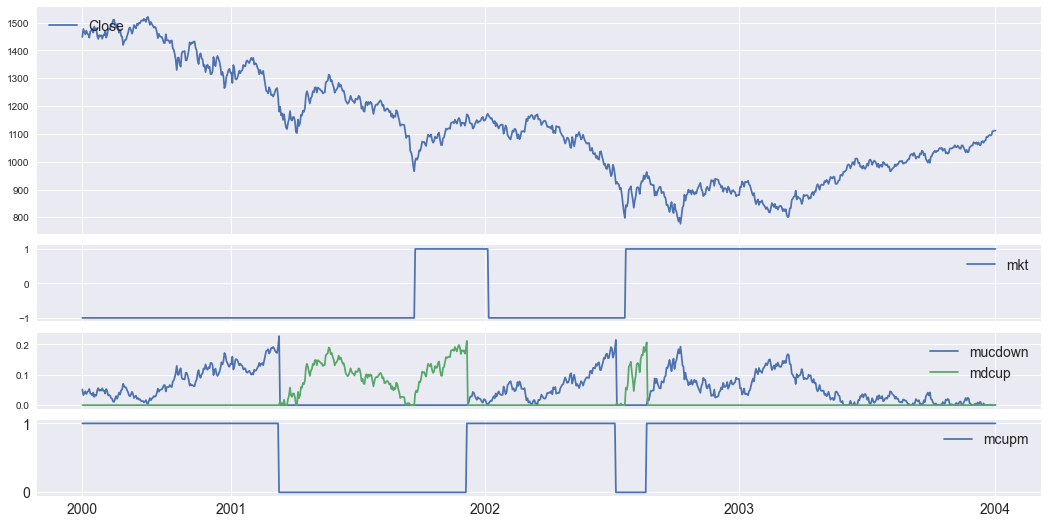

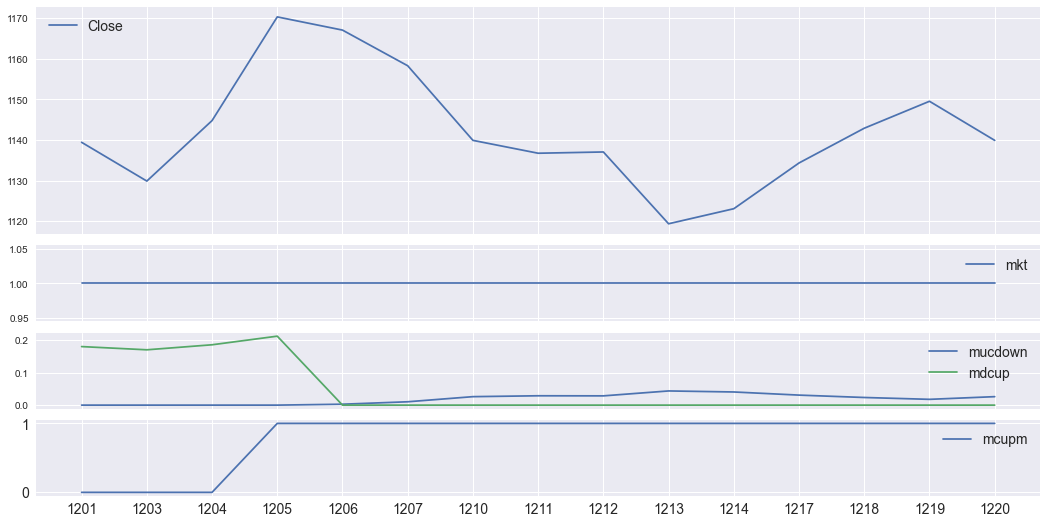

market high


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2000-03-24,1527.459961,1.0,0.0,0.0,1.0


mcupm 1 to 0 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2001-03-08,1264.739990,-1.0,0.171998,0.000000,1.0
2001-03-09,1233.420044,-1.0,0.192503,0.000000,1.0
2001-03-12,1180.160034,-1.0,0.227371,0.000000,0.0
2001-03-13,1197.660034,-1.0,0.000000,0.014828,0.0


mcupm 0 to 1 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2001-12-03,1129.900024,1.0,0.000000,0.169911,0.0
2001-12-04,1144.800049,1.0,0.000000,0.185339,0.0
2001-12-05,1170.349976,1.0,0.000000,0.211793,1.0
2001-12-06,1167.099976,1.0,0.002777,0.000000,1.0


In [291]:
# Y2K
%run fmplot

s=dt.datetime(2000,6,1)
e=dt.datetime(2004,1,1)

fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))


s=dt.datetime(2001,12,1)
e=dt.datetime(2001,12,20)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))

print('market high')
s=dt.datetime(2001,3,24)
e=dt.datetime(2001,3,24)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 1 to 0 market change detected')
s=dt.datetime(2001,3,8)
e=dt.datetime(2001,3,13)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

s=dt.datetime(2001,12,3)
e=dt.datetime(2001,12,6)
print('mcupm 0 to 1 market change detected')
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])




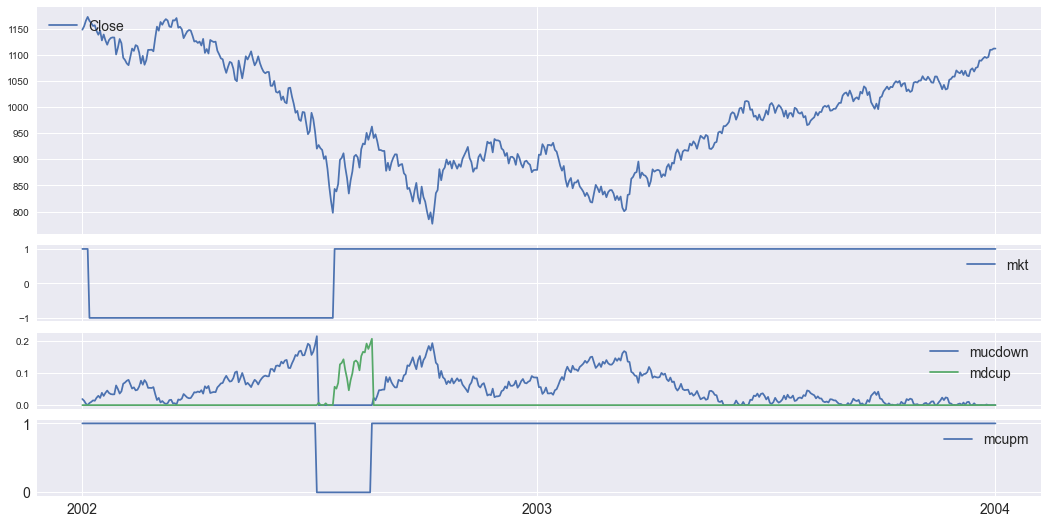

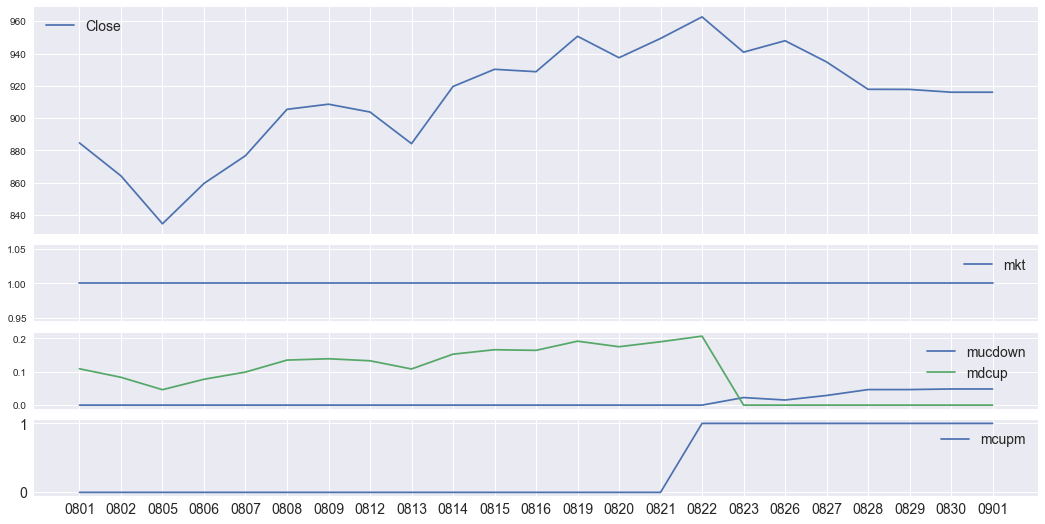

market high


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2002-01-04,1172.51001,1.0,0.0,0.0,1.0


mcupm 1 to 0 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2002-07-08,976.979980,-1.0,0.166762,0.000000,1.0
2002-07-09,952.830017,-1.0,0.187359,0.000000,1.0
2002-07-10,920.469971,-1.0,0.214958,0.000000,0.0
2002-07-11,927.369995,-1.0,0.000000,0.007496,0.0


mcupm 0 to 1 market change detected


,Close,mkt,mucdown,mdcup,mcupm
date,,,,,
2002-08-20,937.429993,1.0,0.000000,0.175166,0.0
2002-08-21,949.359985,1.0,0.000000,0.190122,0.0
2002-08-22,962.700012,1.0,0.000000,0.206845,1.0
2002-08-23,940.859985,1.0,0.022686,0.000000,1.0


In [297]:
# 2001 ... following Y2K

%run fmplot


s=dt.datetime(2002,1,1)
e=dt.datetime(2004,1,1)

fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))


s=dt.datetime(2002,8,1)
e=dt.datetime(2002,9,1)


fmplot(df_ml,['Close','mkt',['mucdown','mdcup'],'mcupm'], plottypes =['line','line','line','line'], 
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right','upper right'],
      figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, legend_fontsize=14, height_ratios=(3,1,1,1))

print('market high')
s=dt.datetime(2002,1,4)
e=dt.datetime(2002,1,4)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

print('mcupm 1 to 0 market change detected')
s=dt.datetime(2002,7,8)
e=dt.datetime(2002,7,11)
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])

s=dt.datetime(2002,8,20)
e=dt.datetime(2002,8,23)
print('mcupm 0 to 1 market change detected')
display(df_ml[s:e][['Close','mkt','mucdown','mdcup','mcupm']])


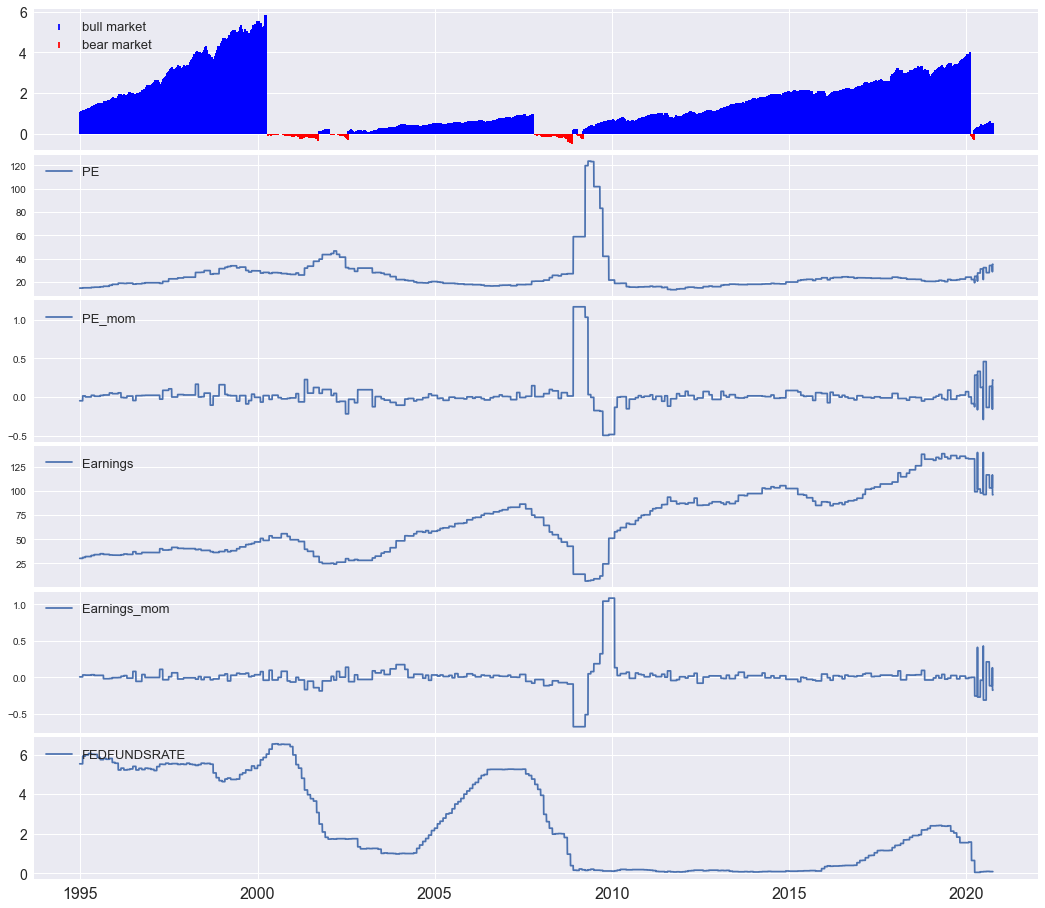

In [219]:
# PE Data

%run fmtransforms
%run fmplot

s=dt.datetime(1950,1,1)
e=dt.datetime(2010,1,1)

#s=dt.datetime(2007,1,1)
#e=dt.datetime(2010,1,1)

s=dt.datetime(1995,1,1)
e=dt.datetime(2020,10,5)

fmplot(df_ml,variables=['mcnr','PE','PE_mom','Earnings','Earnings_mom','FEDFUNDSRATE'],plottypes=['mktcycle','line','line','line','line','line'],
       sharex=True, hspace=0.03, startdate=s,enddate=e, figsize=[18,16],  
       xtick_labelsize=16, ytick_labelsize=14,legend_fontsize=13 )

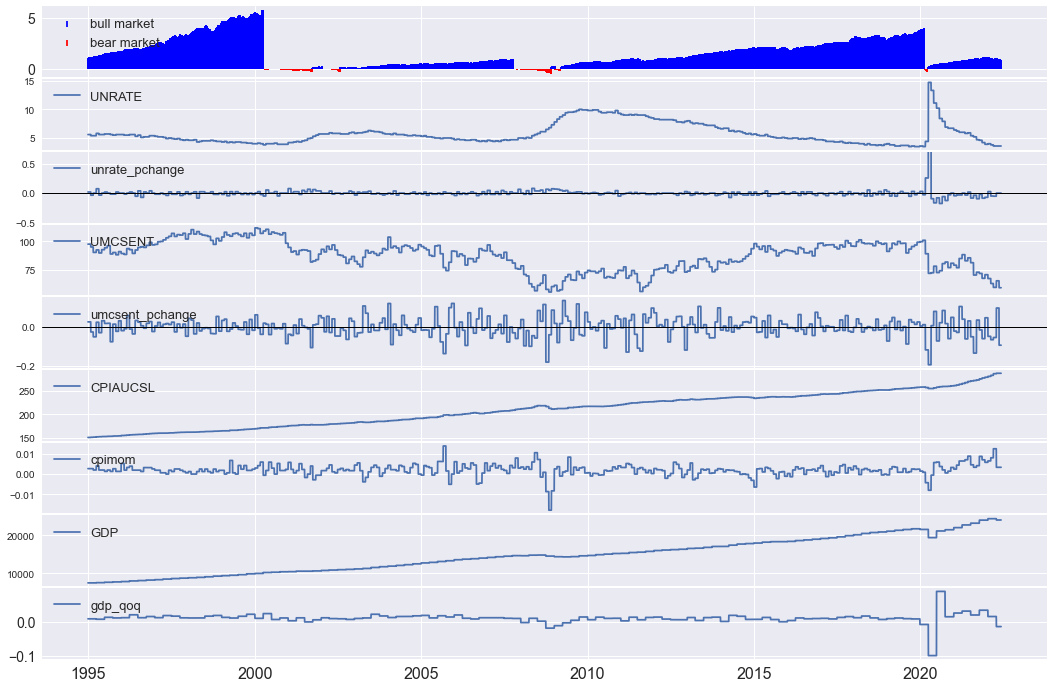

In [137]:
s=dt.datetime(1950,1,1)
e=dt.datetime(2020,10,5)

s=dt.datetime(1995,1,1)
e=dt.datetime(2020,10,5)

s=dt.datetime(1995,1,1)
e=dt.datetime(2022,5,20)

fmplot(df_ml,variables=['mcnr','UNRATE','unrate_pchange','UMCSENT','umcsent_pchange','CPIAUCSL' ,'cpimom','GDP','gdp_qoq'],
       plottypes=['mktcycle','','','','','','','',''],
       hspace=.03, sharex=True,ylims=['','',(-0.5,0.7),'','','','','',''],hlines=['','',0,'',0,'','','',''],
      startdate=s,enddate=e, figsize=[18,12],xtick_labelsize=16, ytick_labelsize=14,legend_fontsize=13 )

#### Conumer Price Index
* Generally prices will rise overtime
* Prices will faster during inflationary periods and tight labor markets causing market instability

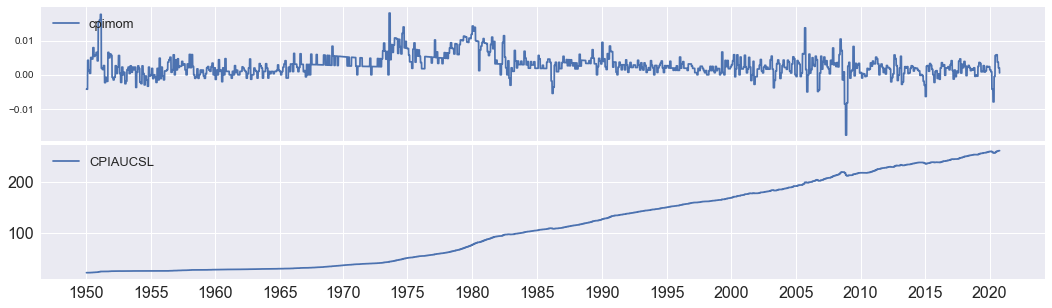

In [138]:
# Consumer Price Index

%run fmtransforms
%run fmplot

s=dt.datetime(1980,1,1)
e=dt.datetime(1983,1,1)

#s=dt.datetime(1950,1,1)
#e=dt.datetime(2020,8,24)

s=dt.datetime(1950,1,1)
e=dt.datetime(2020,10,5)

fmplot(df_ml,variables=['cpimom','CPIAUCSL'], startdate=s,enddate=e,hspace=.025,
       xtick_labelsize=16, ytick_labelsize=16,sharex=True,figsize=[18,5],legend_fontsize=13)

#### 200 day MA vs 20 day and 50 day MA
* 20 day and 50 day MA cross above 200 day indicating positive price movement 
* 20 day and 50 day MA cross below 200 day indicating negative price movement
* 50 day Volume MA increases during price movements

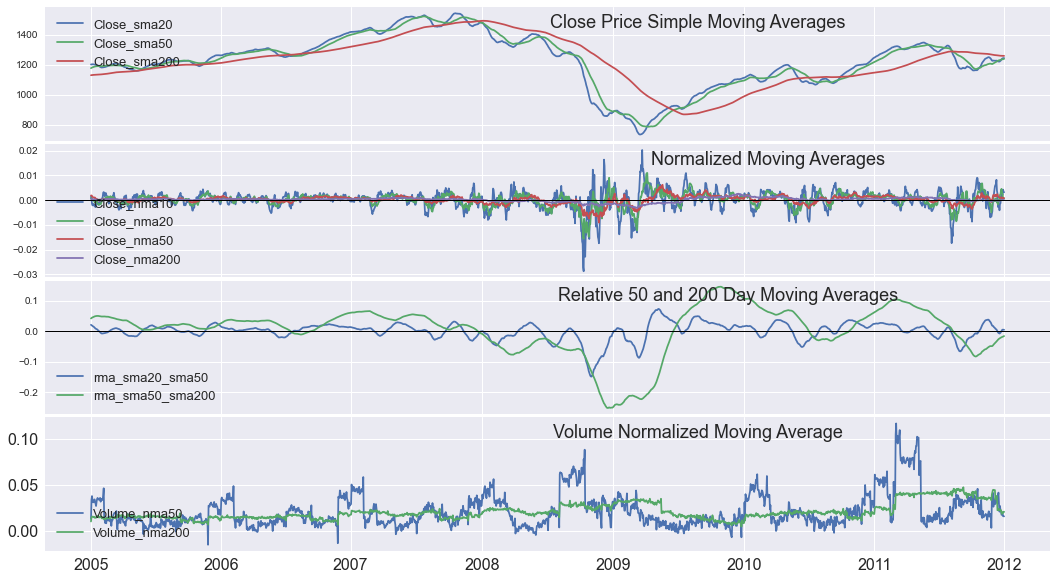

In [153]:
# Momentum Moving Averages

%run fmplot
startdate = dt.datetime(1976,6,1)
enddate = dt.datetime(2000,8,1)
startdate = dt.datetime(2005,1,1)
enddate = dt.datetime(2012,1,1)
#startdate = dt.datetime(2020,3,1)
#enddate = dt.datetime(2020,4,14)


titles=['Close Price Simple Moving Averages','Normalized Moving Averages','Relative 50 and 200 Day Moving Averages',
        'Volume Normalized Moving Average']
variables=[ [ 'Close_sma20', 'Close_sma50', 'Close_sma200'], [ 'Close_nma10'  , 'Close_nma20', 'Close_nma50','Close_nma200'],
           ['rma_sma20_sma50' ,  'rma_sma50_sma200'],
           ['Volume_nma50','Volume_nma200']]

fmplot(df_ml,variables,titles=titles,startdate=startdate,
          enddate=enddate, llocs=['upper left','lower left','lower left','lower left','upper left'], 
          title_fontsize=18, titlein=True, hlines=['',0,0,''],titlexy=[(0.65,0.8),(0.72,0.8),(0.68,0.8),(0.65,0.8)],
          hspace=.025, sharex=True, xtick_labelsize=16, ytick_labelsize=16,legend_fontsize=13, figsize=(18,10))

#### ADX (Average Directional Movement ndex)
* Observe Negative Directional Index (NDI) cross above Positive Directional Index (PDI) during the 2008 to 2009 bear market

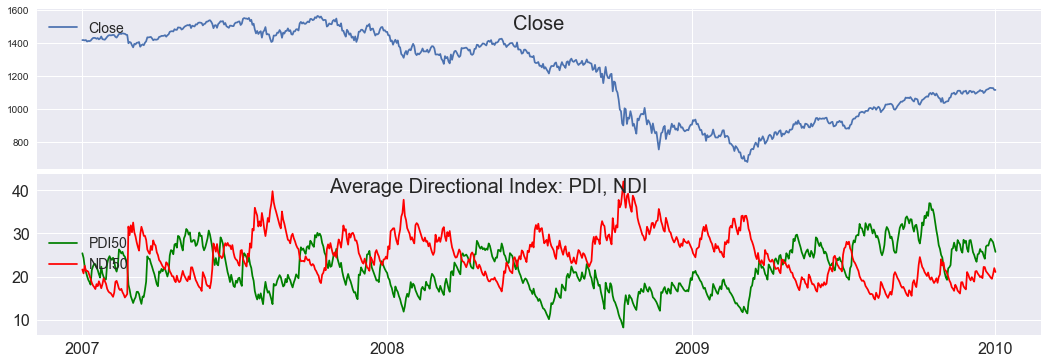

In [140]:
# ADX
startdate = dt.datetime(1976,6,1)
enddate = dt.datetime(2000,8,1)
startdate = dt.datetime(2007,1,1)
enddate = dt.datetime(2010,1,1)
#startdate = dt.datetime(2020,1,1)
#enddate = dt.datetime(2020,4,14)

titles=['Close', 'Average Directional Index: PDI, NDI']
fmplot(df_ml,['Close',['PDI50','NDI50']],titles=titles,startdate=startdate, 
          enddate=enddate,hspace=.03, sharex=True,titlein = True, titlexy=[(0.5,0.83),(0.45,0.85)],
           llocs=['upper left','center left','center left'],
          linecolors=['',['g','r','b']], xtick_labelsize=16, ytick_labelsize=16, 
          legend_fontsize=14,title_fontsize=20, figsize=(18,6))

#### Market Volatility
* Observe high volatility as the market during the last phase of the bull market and bear market
* Market volatility decreases coming out of the Bear and into the Bull

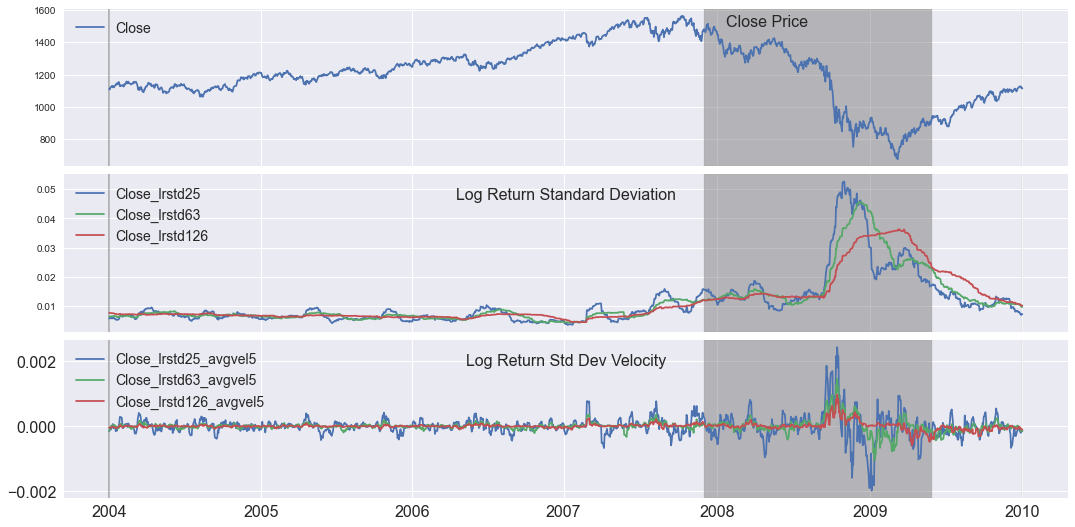

In [141]:
# Volatility
%run fmplot
#startdate = dt.datetime(1950,1,1)
#startdate = dt.datetime(1999,1,1)
#enddate = dt.datetime(2002,1,1)
#enddate = dt.datetime(2020,4,1)
startdate = dt.datetime(2004,1,1)
enddate = dt.datetime(2010,1,1)
#startdate = dt.datetime(2019,1,1)
#enddate = dt.datetime(2020,4,14)


fmplot(df_ml,['Close',['Close_lrstd25','Close_lrstd63','Close_lrstd126'],['Close_lrstd25_avgvel5','Close_lrstd63_avgvel5','Close_lrstd126_avgvel5']],
          titles=[ 'Close Price','Log Return Standard Deviation','Log Return Std Dev Velocity'],startdate=startdate, 
          enddate=enddate, llocs=['upper left', 'upper left','upper left','upper left'],titlein=True, title_fontsize=16, hspace=0.05,fb=recessions,
          titlexy=[(0.7,0.85),'',''], sharex=True,
          xtick_labelsize=16, ytick_labelsize=16,legend_fontsize=14, figsize=(18,9))

### Comments and Observations
* **CPIAUCSL, cpimom** - No obvious easily understood relationship with CPIAUCSL, also shows 0.11 correlation with market
* **GDP, gdpqoq** - similar situation with GDP, though shows 0.11 correlation with market

# Step 4 Correlate and Heatmap 

In [220]:
print(df_ml.columns)
df_ml.head()

Index(['Year', 'Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt',
       'mcupm', 'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings',
       'Earnings_mom', 'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq',
       'recession1q', 'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL',
       'cpimom', 'UMCSENT', 'umcsent_pchange', 'Close_sma20', 'Close_sma50',
       'Close_sma200', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto

,Year,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_sma20,Close_sma50,Close_sma200,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1950,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-04,1950,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-05,1950,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-06,1950,1,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1950-01-09,1950,1,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [221]:
df_ml2=df_ml.copy()
df_ml2.drop(['Close_sma20','Close_sma50','Close_sma200','Year'],axis=1,inplace=True)
tmp_remove_cols=['Close','High','Low','Open','Volume','Earnings']
corr_matrix = df_ml2.drop(columns=tmp_remove_cols,axis=1).corr()
print(corr_matrix.columns.values)
print(corr_matrix['mkt'].sort_values( ascending = False))

['Month' 'mkt' 'mcupm' 'mcnr' 'mucdown' 'mdcup' 'PE' 'PE_mom'
 'Earnings_mom' 'T10Y3M' 'FEDFUNDSRATE' 'GDP' 'gdp_qoq' 'recession1q'
 'recession2q' 'UNRATE' 'unrate_pchange' 'CPIAUCSL' 'cpimom' 'UMCSENT'
 'umcsent_pchange' 'Close_nma1' 'Volume_nma1' 'Close_nma5' 'Volume_nma5'
 'Close_nma10' 'Volume_nma10' 'Close_nma15' 'Volume_nma15' 'Close_nma20'
 'Volume_nma20' 'Close_nma30' 'Volume_nma30' 'Close_nma50' 'Volume_nma50'
 'Close_nma200' 'Volume_nma200' 'rma_sma50_sma200' 'rma_sma20_sma50'
 'PDI50' 'NDI50' 'ADX' 'Close_lrstd25' 'Close_lrstd63' 'Close_lrstd126'
 'Close_lrstd25_avgvel5' 'Close_lrstd63_avgvel5' 'Close_lrstd126_avgvel5'
 'Week' 'Day' 'Dayofweek' 'Dayofyear' 'Quarter' 'daysfrom_q_start'
 'daysto_q_end' 'daysto_year_end' 'daysfrom_year_start' 'FFR_id'
 'FFR_prev1' 'FFR_prev2' 'FFR_prev1_delta' 'FFR_prev2_delta'
 'FFR_days_from_prev1' 'FFR_days_from_prev2']
mkt                       1.000000
mcnr                      0.406555
Close_nma200              0.385064
Close_nma50       

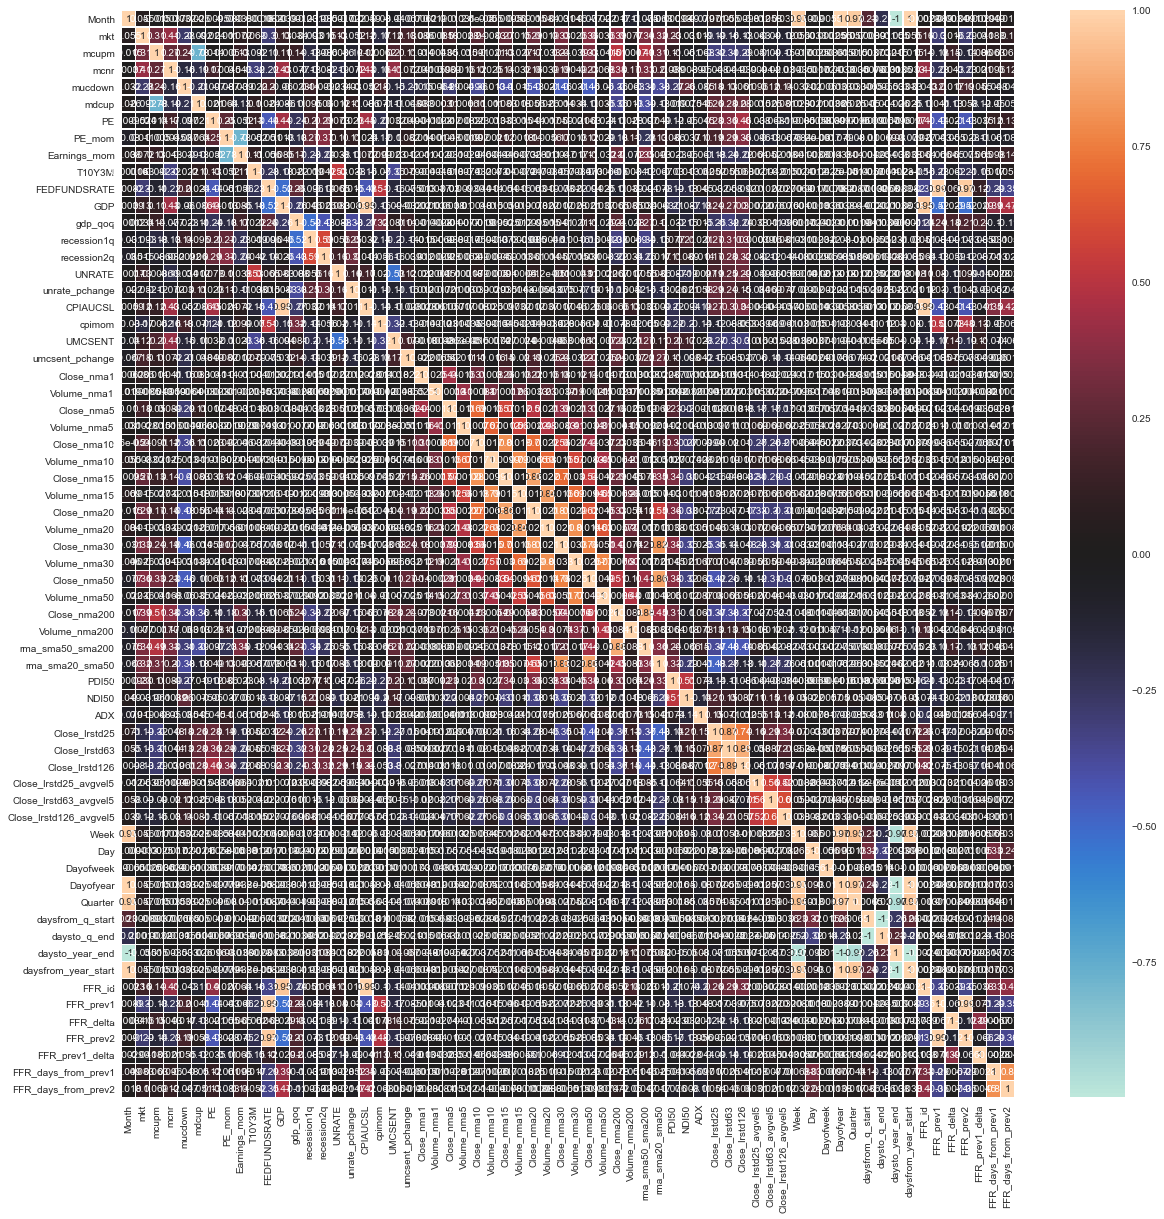

In [163]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, center=0, annot=True, linewidths=.3, ax=ax)
plt.show()

In [164]:
df_ml2.columns

Index(['Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm',
       'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q',
       'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom',
       'UMCSENT', 'umcsent_pchange', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto_q_end', 'year_end_date', 'daysto_year_end', 'year_start_date

In [165]:
display(df_ml2.head())
display(df_ml2.tail())

,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_delta,FFR_prev1_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_date,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1950-01-04,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1950-01-05,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1950-01-06,1,16.98,16.98,16.98,16.98,2010000.0,1.0,1.0,0.019208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.002953,-0.211765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.571697,0.0,62.185719,NaN,NaN,NaN,NaN,NaN,NaN,1,6,4,6,1,1950-01-01,1950-03-31,5,84,1950-12-31,359,1950-01-01,5,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1950-01-09,1,17.08,17.08,17.08,17.08,2520000.0,1.0,1.0,0.025210,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.005889,0.253731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.639176,0.0,49.370302,NaN,NaN,NaN,NaN,NaN,NaN,2,9,0,9,1,1950-01-01,1950-03-31,8,81,1950-12-31,356,1950-01-01,8,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,T10Y3M,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_delta,FFR_prev1_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_date,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-23,5,3973.750000,3981.879883,3909.040039,3919.419922,3.392770e+09,1.0,1.0,0.776057,0.171542,0.0,23.16,-0.103368,196.28065,0.119088,1.79,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.018555,0.130025,-0.001472,-0.009783,-0.000274,-0.024424,-0.002760,-0.011004,-0.002258,0.000889,-0.003195,0.004337,-0.001269,0.004347,-0.000436,0.010927,-0.037691,-0.054459,16.236528,30.278986,22.103695,0.020360,0.016465,0.014208,0.000376,0.000180,0.000082,21,23,0,143,2,2022-04-01,2022-06-30,52,38,2022-12-31,222,2022-01-01,142,18537.0,0.33,0.5,2022-04-01,0.2,0.13,2022-03-01,46.0,77.0
2022-05-24,5,3941.479980,3955.679932,3875.129883,3942.939941,3.901640e+09,1.0,1.0,0.761634,0.178269,0.0,23.16,-0.103368,196.28065,0.119088,1.70,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,-0.008121,0.149987,-0.007130,0.019050,-0.001331,-0.006982,-0.003624,0.007883,-0.002769,0.006847,-0.003838,0.011063,-0.001879,0.004248,-0.000483,0.011414,-0.039056,-0.055449,15.597642,30.440538,22.721402,0.020354,0.016212,0.014189,0.000299,0.000087,0.000054,21,24,1,144,2,2022-04-01,2022-06-30,53,37,2022-12-31,221,2022-01-01,143,18537.0,0.33,0.5,2022-04-01,0.2,0.13,2022-03-01,47.0,78.0
2022-05-25,5,3978.729980,3999.330078,3925.030029,3929.590088,4.322190e+09,1.0,1.0,0.778283,0.170503,0.0,23.16,-0.103368,196.28065,0.119088,1.69,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.009451,0.107788,0.002839,0.010328,0.001260,0.002651,-0.004984,0.008902,-0.003534,0.011036,-0.003118,0.010974,-0.001937,0.009715,-0.000476,0.012359,-0.040497,-0.057144,16.889216,29.529403,22.719325,0.020439,0.016272,0.014155,0.000034,-0.000060,-0.000044,21,25,2,145,2,2022-04-01,2022-06-30,54,36,2022-12-31,220,2022-01-01,144,18537.0,0.33,0.5,2022-04-01,0.2,0.13,2022-03-01,48.0,79.0
2022-05-26,5,4057.840088,4075.139893,3984.600098,3984.600098,3.961940e+09,1.0,1.0,0.813641,0.154010,0.0,23.16,-0.103368,196.28065,0.119088,1.68,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.019883,-0.083349,0.007983,0.003449,0.003378,-0.011682,-0.001282,0.003953,-0.000725,0.007195,-0.002455,0.008195,-0.001772,-0.003966,-0.000420,0.011772,-0.041860,-0.056223,19.288151,28.382092,22.003357,0.020321,0.016386,0.014260,0.000015,-0.000032,0.000002,21,26,3,146,2,2022-04-01,2022-06-30,55,35,2022-12-31,219,2022-01-01,145,18537.0,0.33,0.5,2022-04-01,0.2,0.13,2022-03-01,49.0,80.0
2022-05-27,5,4158.240234,4158.490234,4077.429932,4077.429932,3.560560e+09,1.0,1.0,0.858515,0.133079,0.0,23.16,-0.103368,196.28065,0.119088,1.66,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.024742,-0.101309,0.012902,0.040628,0.003465,-0.005271,0.000745,-0.003701,0.000512,0.002130,-0.001624,0.005968,-0.001269,0.002151,-0.000303,0.011143,-0.042867,-0.054575,21.861338,27.232405,20.956536,0.020955,0.016517,0.014395,0.000141,0.000023,0.000041,21,27,4,147,2,2022-04-01,2022-06-30,56,34,2022-12-31,218,2022-01-01,146,18537.0,0.33,0.5,2022-04-01,0.2,0.13,2022-03-01,50.0,81.0


In [169]:
# Correlate variables with shifts of the target variable ("mkt"). 
# Save the correlations for each variable in a dictionary, 
# where each key points at a list of the sweep
# from 1 day shift to n = 200.

#var_list=df_ml2.columns

categorical_vars = ['q_first_date','q_last_date','year_end_date','year_start_date','mkt_1','mkt_2','mkt_4','FFR_prev1_date','FFR_prev2_date']

var_list = [c for c in df_ml2.columns if c not in categorical_vars]

corr_vars = ['corr_'+v for v in var_list]  # name of each = corr_"variable" key for the corr_dict 
corr_dict={c : [] for c in corr_vars}     # dictionary of correlations key = "corr_variablename"

total_corr=[]

# iterate over shifted target variable
for k in range(1, 201):
    mkt_n = 'mkt_' + str(k)              # shifted variable name
    df_ml2[mkt_n]=df_ml2['mkt'].shift(k)   # shifted variable 
    corr_matrix = df_ml2.corr()           # new correlation matrix
    print(k,end = '.. ')
    
    # Iterate through dictionary keys and corresponding variables
    for c,v in zip(corr_dict,var_list):
        corr_dict[str(c)].append(corr_matrix[v][mkt_n])  # append correlation to list according to variable key
    
    df_ml2.drop(mkt_n, axis=1, inplace=True)  # drop the shifted target variable
        
    # add up the total correlations ... approximationdoes not factor in negative cross contributions
    total_corr.append(corr_matrix[mkt_n].abs().sum()-1)
    

corr_dict.update({'total_corr' : total_corr})
    

#for key in corr_dict:
#    print('corr_dict key =',key)


1.. 2.. 3.. 4.. 5.. 6.. 7.. 8.. 9.. 10.. 11.. 12.. 13.. 14.. 15.. 16.. 17.. 18.. 19.. 20.. 21.. 22.. 23.. 24.. 25.. 26.. 27.. 28.. 29.. 30.. 31.. 32.. 33.. 34.. 35.. 36.. 37.. 38.. 39.. 40.. 41.. 42.. 43.. 44.. 45.. 46.. 47.. 48.. 49.. 50.. 51.. 52.. 53.. 54.. 55.. 56.. 57.. 58.. 59.. 60.. 61.. 62.. 63.. 64.. 65.. 66.. 67.. 68.. 69.. 70.. 71.. 72.. 73.. 74.. 75.. 76.. 77.. 78.. 79.. 80.. 81.. 82.. 83.. 84.. 85.. 86.. 87.. 88.. 89.. 90.. 91.. 92.. 93.. 94.. 95.. 96.. 97.. 98.. 99.. 100.. 101.. 102.. 103.. 104.. 105.. 106.. 107.. 108.. 109.. 110.. 111.. 112.. 113.. 114.. 115.. 116.. 117.. 118.. 119.. 120.. 121.. 122.. 123.. 124.. 125.. 126.. 127.. 128.. 129.. 130.. 131.. 132.. 133.. 134.. 135.. 136.. 137.. 138.. 139.. 140.. 141.. 142.. 143.. 144.. 145.. 146.. 147.. 148.. 149.. 150.. 151.. 152.. 153.. 154.. 155.. 156.. 157.. 158.. 159.. 160.. 161.. 162.. 163.. 164.. 165.. 166.. 167.. 168.. 169.. 170.. 171.. 172.. 173.. 174.. 175.. 176.. 177.. 178.. 179.. 180.. 181.. 182.. 183.. 184.. 185.

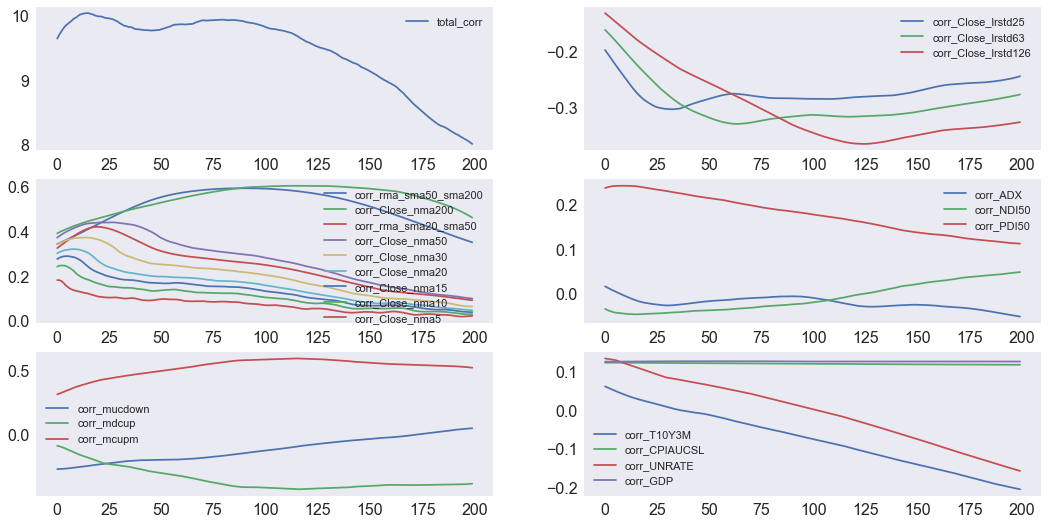

In [170]:
# Look at correlations with shifts of the target variable
 

# k by k plot   

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=[18,9])

corr_list=[ 
       [['total_corr'] , ['corr_Close_lrstd25','corr_Close_lrstd63','corr_Close_lrstd126']],
       [['corr_rma_sma50_sma200','corr_Close_nma200', 'corr_rma_sma20_sma50','corr_Close_nma50','corr_Close_nma30','corr_Close_nma20','corr_Close_nma15','corr_Close_nma10','corr_Close_nma5'], ['corr_ADX','corr_NDI50','corr_PDI50']],
       [['corr_mucdown','corr_mdcup','corr_mcupm'], ['corr_T10Y3M','corr_CPIAUCSL','corr_UNRATE','corr_GDP']],    
     ]


for k2 in range(0,3):
    for k1 in range(0,2): 
        for key in corr_list[k2][k1]:
            ax[k2,k1].plot(corr_dict[str(key)], label=key)
        ax[k2,k1].legend(loc='upper right')
        ax[k2,k1].grid()
        ax[k2,k1].legend(fontsize=11)
        ax[k2,k1].tick_params( labelsize=16)

    
plt.show() 

# 5. Save the ML Dataframe

In [225]:
# Save the df_ml dataframe

print(df_ml2.columns)

today = dt.datetime.today()
startDate=df_ml.index[0]
endDate=df_ml.index[df_ml.index.size-1]
filename='./data/df_ml_'+str(today.year)+str(today.month)+str(today.day)+'_'+str(startDate.year)+str(startDate.month)+\
          str(startDate.day)+'_to_'+str(endDate.year)+str(endDate.month)+str(endDate.day)+'.csv'
print('save filename =',filename)

# save the data index as a column named date 
df_ml2.reset_index().rename(columns={'index':'Date'}).to_csv(filename,index=False)

#save filename = ./data/df_ml_2020115_195013_to_2020114.csv
#save filename = ./data/df_ml_2022520_195013_to_2022520.csv

Index(['Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm',
       'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'T10Y3M', 'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q',
       'recession2q', 'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom',
       'UMCSENT', 'umcsent_pchange', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto_q_end', 'year_end_date', 'daysto_year_end', 'year_start_date

In [223]:
import numpy as np
x = np.arange(10)
reverse = True
if reverse == False:
    indices = list(np.argsort(x)[::-1])
else:
    indices = list(np.argsort(x))
    
print(x[indices])
print(list(x).sort())

[0 1 2 3 4 5 6 7 8 9]
None


In [27]:
a= list(x)